In [20]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# DATA PREP

Uploading the data

In [349]:
# import dask.dataframe as dd
# df1 = pd.read_csv(r"C:\Users\assaf\Desktop\credit_card_fraud.csv")
# df2 = pd.read_csv(r"C:\Users\assaf\Desktop\customers.csv", sep='|')

In [21]:
df1 = pd.read_csv(r"Desktop\credit_card_fraud.csv")
df2 = pd.read_csv(r"Desktop\customers.csv", sep='|')

In [22]:
# Convert the 'date_column_name' to datetime (replace 'date_column_name' with the actual column name)
df1['trans_date'] = pd.to_datetime(df1['trans_date'])

# Extract the year from the date column
df1['year'] = df1['trans_date'].dt.year
# Extract the month from the date column
df1['month'] = df1['trans_date'].dt.month
# Extract the year from the date column
df1['day'] = df1['trans_date'].dt.day
# Extract the quarter from the date column
df1['quarter'] = df1['trans_date'].dt.quarter

In [23]:
# Add 'is_weekend' column (True for Saturday & Sunday, False otherwise)
df1['is_weekend'] = df1['day'] >= 5  # 5 (Saturday), 6 (Sunday)

In [24]:
df1['year'].unique()

array([2020, 2019])

In [25]:
df1['month'].unique()

array([ 2, 12, 10,  6,  1,  3,  5,  4,  9,  7,  8, 11])

In [26]:
df1['day'].unique()

array([15, 16, 26, 27,  3,  4, 14, 19, 18, 24, 30,  8, 11, 17, 13, 12, 23,
       21,  1, 22, 20,  5,  2, 25, 28, 29,  6, 10,  7, 31,  9])

In [27]:
df1['is_weekend'].unique()

array([ True, False])

In [28]:
df1['quarter'].unique()

array([1, 4, 2, 3])

## Reducing the df by year and quarter

In [29]:
# Filter rows where year is 2019
df1 = df1[df1['year'] == 2019]

# Filter rows where quarter is 4
df1 = df1[df1['quarter'] == 4]

# Filter rows where month is 11
df1 = df1[df1['month'] == 11]

In [30]:
df1['year'].value_counts()

year
2019    1364656
Name: count, dtype: int64

In [31]:
df1.head()

Unnamed: 0          ssn               cc_num      first     last gender  \
356         356  053-27-1953  4499269417632698520  Elizabeth  Donovan      F   
363         363  053-27-1953  4499269417632698520  Elizabeth  Donovan      F   
399         399  053-27-1953  4499269417632698520  Elizabeth  Donovan      F   
404         404  053-27-1953  4499269417632698520  Elizabeth  Donovan      F   
420         420  053-27-1953  4499269417632698520  Elizabeth  Donovan      F   

                    street     city state    zip  ...    amt  is_fraud  \
356  1388 Thompson Station  Rowlett    TX  75089  ...  79.45         0   
363  1388 Thompson Station  Rowlett    TX  75089  ...  58.73         0   
399  1388 Thompson Station  Rowlett    TX  75089  ...   8.93         0   
404  1388 Thompson Station  Rowlett    TX  75089  ...   1.49         0   
420  1388 Thompson Station  Rowlett    TX  75089  ...  99.41         0   

                                   merchant  merch_lat merch_long  year month  \
356  fraud_Stanton, Jakubowski and Baumbach  32.283283 -97.201143  2019    11   
363           fraud_Reichert, Rowe and Mraz  33.609259 -95.649545  2019    11   
399                      fraud_Kassulke PLC  33.125897 -96.992439  2019    11   
404           fraud_Reichert, Rowe and Mraz  33.827816 -96.317710  2019    11   
420                     fraud_Ankunding LLC  32.300162 -96.499424  2019    11   

    day quarter is_weekend  
356  22       4       True  
363  16       4       True  
399   8       4       True  
404  29       4       True  
420  27       4       True  

[5 rows x 32 columns]

In [32]:
df1.columns

Index(['Unnamed: 0', 'ssn', 'cc_num', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'acct_num', 'profile', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'year', 'month', 'day', 'quarter', 'is_weekend'],
      dtype='object')

In [33]:
df2.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'],
      dtype='object')

In [34]:
# Get the common column names
common_columns = df1.columns.intersection(df2.columns)

# Display the common columns
print("Common columns:", common_columns)

Common columns: Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'],
      dtype='object')


### Merging tables 
Inner Join                                                                                                                        
This type of merge returns only the rows where there is a match between the two dataframes.<br>                                      
Outer Join      <br>                                                                                                              This type of merge returns all rows from both dataframes, and fills in NaN where there are no matches.

In [35]:
# Merge the dataframes on common columns without duplicating columns
merged_df= pd.merge(df1, df2, on=['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'], how='inner')

# Display the first few rows of the merged dataframe
merged_df

Unnamed: 0          ssn               cc_num      first     last  \
0               356  053-27-1953  4499269417632698520  Elizabeth  Donovan   
1               363  053-27-1953  4499269417632698520  Elizabeth  Donovan   
2               399  053-27-1953  4499269417632698520  Elizabeth  Donovan   
3               404  053-27-1953  4499269417632698520  Elizabeth  Donovan   
4               420  053-27-1953  4499269417632698520  Elizabeth  Donovan   
...             ...          ...                  ...        ...      ...   
1364651    34635925  198-77-7126     6011074559874044      Kevin     Dunn   
1364652    34635970  198-77-7126     6011074559874044      Kevin     Dunn   
1364653    34635992  198-77-7126     6011074559874044      Kevin     Dunn   
1364654    34635995  198-77-7126     6011074559874044      Kevin     Dunn   
1364655    34636006  198-77-7126     6011074559874044      Kevin     Dunn   

        gender                 street        city state    zip  ...    amt  \
0            F  1388 Thompson Station     Rowlett    TX  75089  ...  79.45   
1            F  1388 Thompson Station     Rowlett    TX  75089  ...  58.73   
2            F  1388 Thompson Station     Rowlett    TX  75089  ...   8.93   
3            F  1388 Thompson Station     Rowlett    TX  75089  ...   1.49   
4            F  1388 Thompson Station     Rowlett    TX  75089  ...  99.41   
...        ...                    ...         ...   ...    ...  ...    ...   
1364651      M    21431 Daniel Canyon  Chesapeake    VA  23320  ...   7.44   
1364652      M    21431 Daniel Canyon  Chesapeake    VA  23320  ...  13.04   
1364653      M    21431 Daniel Canyon  Chesapeake    VA  23320  ...   8.68   
1364654      M    21431 Daniel Canyon  Chesapeake    VA  23320  ...  12.73   
1364655      M    21431 Daniel Canyon  Chesapeake    VA  23320  ...   4.49   

         is_fraud                                merchant  merch_lat  \
0               0  fraud_Stanton, Jakubowski and Baumbach  32.283283   
1               0           fraud_Reichert, Rowe and Mraz  33.609259   
2               0                      fraud_Kassulke PLC  33.125897   
3               0           fraud_Reichert, Rowe and Mraz  33.827816   
4               0                     fraud_Ankunding LLC  32.300162   
...           ...                                     ...        ...   
1364651         0                      fraud_Mayert Group  37.540128   
1364652         0                        fraud_Conroy Ltd  35.910560   
1364653         0                      fraud_Kris-Padberg  37.232380   
1364654         0                    fraud_Jast-McDermott  36.542500   
1364655         0                        fraud_Metz-Boehm  37.543125   

        merch_long  year month day quarter is_weekend  
0       -97.201143  2019    11  22       4       True  
1       -95.649545  2019    11  16       4       True  
2       -96.992439  2019    11   8       4       True  
3       -96.317710  2019    11  29       4       True  
4       -96.499424  2019    11  27       4       True  
...            ...   ...   ...  ..     ...        ...  
1364651 -75.617194  2019    11   1       4      False  
1364652 -77.195139  2019    11  27       4       True  
1364653 -75.247790  2019    11   2       4      False  
1364654 -75.780140  2019    11  23       4       True  
1364655 -77.127855  2019    11  11       4       True  

[1364656 rows x 32 columns]

In [36]:
merged_df.columns

Index(['Unnamed: 0', 'ssn', 'cc_num', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'acct_num', 'profile', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'year', 'month', 'day', 'quarter', 'is_weekend'],
      dtype='object')

In [37]:
df=merged_df.copy()

## Reduce the df by state

In [38]:
# Define state-to-region mapping
state_regions = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast',
    'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest',
    'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest',
    'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',

    # South
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South',
    'NC': 'South', 'SC': 'South', 'VA': 'South', 'WV': 'South',
    'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South',
    'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',

    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West',
    'HI': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West',
    'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West',
    'WY': 'West'
}

# Convert states to regions in the DataFrame
df['region'] = df['state'].map(state_regions)

df['region'].value_counts()

region
South        499284
West         316614
Midwest      296653
Northeast    249782
Name: count, dtype: int64

In [39]:
# filter only the Northeast region
df = df[df['region'] == 'Northeast']
df['region'].value_counts()

region
Northeast    249782
Name: count, dtype: int64

In [40]:
df['state'].value_counts()

state
NY    86426
PA    59375
NJ    38751
MA    27380
CT    16005
NH     6630
ME     6555
VT     4380
RI     4280
Name: count, dtype: int64

The region column is no longer needed

In [41]:
df = df.drop(['region'], axis=1)

# Clean Text

In [42]:
# Text values are converted to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [43]:
import re

# Remove all special characters from string columns
df = df.applymap(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x) if isinstance(x, str) else x)

In [44]:
# Filter rows where month is 4
df = df[df['month'] == 11]

In [45]:
df

Unnamed: 0          ssn            cc_num     first     last gender  \
185            4722  020 25 6017  4961629578826674  kristina  gilbert      f   
186            4726  020 25 6017  4961629578826674  kristina  gilbert      f   
187            4749  020 25 6017  4961629578826674  kristina  gilbert      f   
188            4751  020 25 6017  4961629578826674  kristina  gilbert      f   
189            4759  020 25 6017  4961629578826674  kristina  gilbert      f   
...             ...          ...               ...       ...      ...    ...   
1364531    34632791  818 50 8758  6586533791930521    isaiah  edwards      m   
1364532    34632797  818 50 8758  6586533791930521    isaiah  edwards      m   
1364533    34632800  818 50 8758  6586533791930521    isaiah  edwards      m   
1364534    34632808  818 50 8758  6586533791930521    isaiah  edwards      m   
1364535    34632820  818 50 8758  6586533791930521    isaiah  edwards      m   

                             street      city state    zip  ...     amt  \
185      59404 steve mews suite 580   boonton    nj   7005  ...   81.83   
186      59404 steve mews suite 580   boonton    nj   7005  ...   68.48   
187      59404 steve mews suite 580   boonton    nj   7005  ...    9.54   
188      59404 steve mews suite 580   boonton    nj   7005  ...    2.93   
189      59404 steve mews suite 580   boonton    nj   7005  ...    1.30   
...                             ...       ...   ...    ...  ...     ...   
1364531   977 harris place apt  701  catskill    ny  12414  ...  223.34   
1364532   977 harris place apt  701  catskill    ny  12414  ...   53.08   
1364533   977 harris place apt  701  catskill    ny  12414  ...  121.28   
1364534   977 harris place apt  701  catskill    ny  12414  ...   66.31   
1364535   977 harris place apt  701  catskill    ny  12414  ...   79.09   

         is_fraud                                merchant  merch_lat  \
185             0  fraud stanton  jakubowski and baumbach  41.497516   
186             0                      fraud predovic inc  40.661566   
187             0                     fraud heathcote llc  41.655939   
188             0         fraud little  gutmann and lynch  40.062355   
189             0                fraud gleason macejkovic  41.285106   
...           ...                                     ...        ...   
1364531         0                         fraud pagac llc  41.833756   
1364532         0                          fraud kuhn llc  41.820045   
1364533         0                          fraud kihn inc  42.991588   
1364534         0                  fraud denesik and sons  42.047309   
1364535         0       fraud haley  jewess and bechtelar  42.359574   

        merch_long  year month day quarter is_weekend  
185     -74.258973  2019    11   9       4       True  
186     -73.849180  2019    11  11       4       True  
187     -75.234739  2019    11  23       4       True  
188     -74.923742  2019    11  24       4       True  
189     -74.645948  2019    11   8       4       True  
...            ...   ...   ...  ..     ...        ...  
1364531 -74.700726  2019    11  27       4       True  
1364532 -74.555250  2019    11   2       4      False  
1364533 -73.760047  2019    11  30       4       True  
1364534 -73.327625  2019    11  27       4       True  
1364535 -74.229708  2019    11  10       4       True  

[249782 rows x 32 columns]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  249782 non-null  int64         
 1   ssn         249782 non-null  object        
 2   cc_num      249782 non-null  int64         
 3   first       249782 non-null  object        
 4   last        249782 non-null  object        
 5   gender      249782 non-null  object        
 6   street      249782 non-null  object        
 7   city        249782 non-null  object        
 8   state       249782 non-null  object        
 9   zip         249782 non-null  int64         
 10  lat         249782 non-null  float64       
 11  long        249782 non-null  float64       
 12  city_pop    249782 non-null  int64         
 13  job         249782 non-null  object        
 14  dob         249782 non-null  object        
 15  acct_num    249782 non-null  int64         
 16  prof

In [47]:
df_copy = df.copy

In [48]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
4722        1
23641208    1
23640742    1
23640760    1
23640800    1
           ..
11828490    1
11828494    1
11828499    1
11828518    1
34632820    1
Name: count, Length: 249782, dtype: int64

it is clear that each row has a unique value so the column isnt giving value to the model

In [49]:
df = df.drop("Unnamed: 0", axis=1)

In [50]:
df.to_pickle('ML - fraud detection.pkl')

In [51]:
df=pd.read_pickle('ML - fraud detection.pkl')

# Covert columns
(string, int, float....)

In [52]:
#!pip install string
import string

In [53]:
# 'Object' Columns to convert to string
columns_to_convert = df.select_dtypes(include=['object']).columns
print(columns_to_convert)

# Convert specified columns to string type and create string_df
string_df = df[columns_to_convert].astype('category')

# # Convert specified columns to string type and create string_df
# string_df = df[columns_to_convert].astype('string')

# Assign the cleaned columns back to the original DataFrame
df[columns_to_convert] = string_df

Index(['ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'job',
       'dob', 'profile', 'trans_num', 'trans_time', 'category', 'merchant'],
      dtype='object')


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ssn         249782 non-null  category      
 1   cc_num      249782 non-null  int64         
 2   first       249782 non-null  category      
 3   last        249782 non-null  category      
 4   gender      249782 non-null  category      
 5   street      249782 non-null  category      
 6   city        249782 non-null  category      
 7   state       249782 non-null  category      
 8   zip         249782 non-null  int64         
 9   lat         249782 non-null  float64       
 10  long        249782 non-null  float64       
 11  city_pop    249782 non-null  int64         
 12  job         249782 non-null  category      
 13  dob         249782 non-null  category      
 14  acct_num    249782 non-null  int64         
 15  profile     249782 non-null  category      
 16  tran

# Pickle file
A pickle file in Python is used to serialize and deserialize Python objects.
Serialization (write binary) is the process of converting a Python object into a byte stream, which can then be written to a file or transmitted over a network.
Deserialization (read binary) is the reverse process, converting the byte stream back into a Python object.

In [55]:
df.to_pickle('ML_fraud detection.pkl')
df=pd.read_pickle('ML_fraud detection.pkl')

In [56]:
import pickle

#Write a pickle file
with open('ML_fraud detection.pkl', 'wb') as f:
    pickle.dump(df, f)

print("ML_fraud detection dataset saved as a pickle file.")

ML_fraud detection dataset saved as a pickle file.


In [57]:
import pickle

#Read a pickle file and load the data
with open('ML_fraud detection.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [70]:
# loaded_data

# Clean Text

In [166]:
df = loaded_data.copy()

exploring features

In [58]:
for col in df:
    print(col)
    print(df[col].value_counts())

ssn
ssn
535 53 1774    206
601 28 2159    205
709 70 9917    205
118 55 8699    203
157 51 7805    201
              ... 
001 40 3390      7
033 15 7333      7
137 17 4570      7
128 17 8509      5
751 47 8336      4
Name: count, Length: 3170, dtype: int64
cc_num
cc_num
639087759820        206
6513286429712013    205
4675154798156       205
4137998181009625    203
6581237112381241    201
                   ... 
6011197613869062      7
676139184797          7
572042247047          7
3541383232498873      5
30371053925904        4
Name: count, Length: 3170, dtype: int64
first
first
michael    4816
david      4249
james      3382
john       3118
joseph     3092
           ... 
hayley       23
doris        22
steve        22
riley        21
martin       20
Name: count, Length: 550, dtype: int64
last
last
smith       4222
johnson     3885
williams    3309
jones       3262
brown       2752
            ... 
cooke         21
jennings      21
strong        20
rollins       17
hurley         7
N

# Narrowing Categories

Identifying Unusual Timing Patterns

In [59]:
df['hour'] = pd.to_datetime(df['unix_time'], unit='s').dt.hour
df['is_suspicious'] = df['hour'].apply(lambda x: x < 6 or x > 22)  # Flag transactions at night
df['is_suspicious'].value_counts()

is_suspicious
False    201706
True      48076
Name: count, dtype: int64

Drop the 'unix_time' and 'hour columns after clustering to categories

In [60]:
df = df.drop(["unix_time", "hour"], axis=1)

In [61]:
df = df.drop("is_suspicious_2", axis=1)

KeyError: "['is_suspicious_2'] not found in axis"

In [ ]:
df = df.drop(["datetime", "time_diff"], axis=1)

In [62]:
import re

# Function to classify credit card issuer based on regex patterns
def classify_credit_card(cc_num):
    cc_num = str(cc_num)  # Convert to string for processing

    # Visa: Starts with 4, length 13 or 16
    if re.match(r"^4[0-9]{12}(?:[0-9]{3})?$", cc_num):
        return "Visa"

    # MasterCard: Starts with 5 or 2, length 16
    elif re.match(r"^(?:5[1-5][0-9]{2}|222[1-9]|22[3-9][0-9]|2[3-6][0-9]{2}|27[01][0-9]|2720)[0-9]{12}$", cc_num):
        return "MasterCard"

    # American Express (AMEX): Starts with 34 or 37, length 15
    elif re.match(r"^3[47][0-9]{13}$", cc_num):
        return "American Express"

    # Diners Club: Starts with 30, 36, 38, 39, length 14
    elif re.match(r"^3(?:0[0-5]|[68][0-9])[0-9]{11}$", cc_num):
        return "Diners Club"

    # Discover: Starts with 6011, 622126-622925, 644-649, or 65, length 16
    elif re.match(r"^6(?:011|5[0-9]{2})[0-9]{12}$", cc_num):
        return "Discover"

    # JCB: Starts with 2131, 1800, or 35xxx, length 16
    elif re.match(r"^(?:2131|1800|35\d{3})\d{11}$", cc_num):
        return "JCB"

    # If no match, return Unknown
    else:
        return "Unknown"

# Apply the reclassification function to the DataFrame
df['issuer'] = df['cc_num'].apply(classify_credit_card)
df['issuer'].value_counts()


issuer
Visa                66286
JCB                 59564
Unknown             44538
MasterCard          22356
Diners Club         19972
Discover            19164
American Express    17902
Name: count, dtype: int64

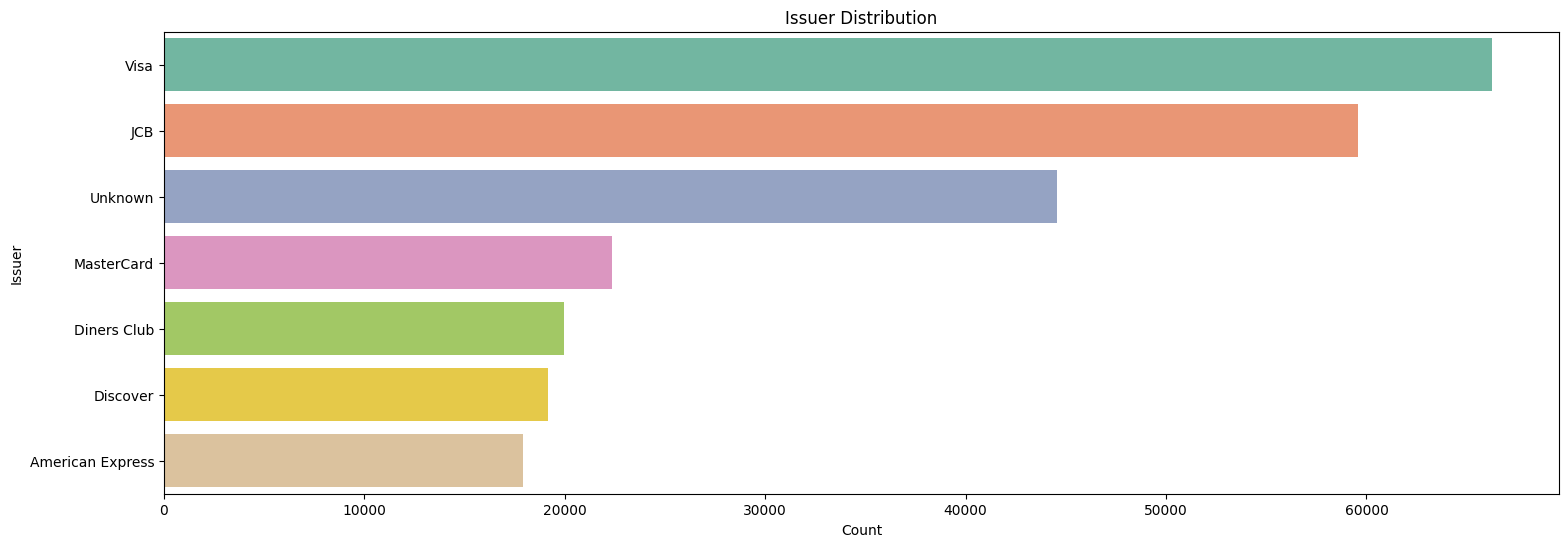

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Using a predefined color palette (e.g., 'Blues')
sns.countplot(data=df, y='issuer', order=df['issuer'].value_counts().index, palette='Set2')

plt.title('Issuer Distribution')
plt.xlabel('Count')
plt.ylabel('Issuer')
plt.show()

After classifing issuer fron cc_num we can now remove the cc_num column

In [64]:
df = df.drop(["cc_num"], axis=1)

The SSN itself does not indicate the person's age or birth date, remove the cc_num column

In [65]:
df = df.drop(["ssn"], axis=1)

pickle

In [66]:
df.to_pickle('ML_fraud_detection_2.pkl')

In [67]:
df = pd.read_pickle('ML_fraud_detection_2.pkl')

In [68]:
import re

def categorize_job(title):
#     title = title.lower()
    if re.search(r'product|software|developer|engineer|technologist|programmer', title):
        return 'Tech'
    elif re.search(r'office|customer|service|support|call|center|client|it', title):
        return 'IT'
    elif re.search(r'homeopath|herbalist|acupuncturist|osteopath|chiropodist|ophthalmologist|orthoptist|pharmacologist|optometrist|psychiatrist|podiatrist|medical|toxicologist|radiographer|therapeutic|haematologist|oncologist|immunologist|midwife|pathologist|dentist|biochemist|clinical|nurse|doctor|healthcare|health|psychotherapist|therapist|psychologist|physiologist|pharmacist|surgeon|optician', title):
        return 'Healthcare'
    elif re.search(r'pension|actuary|finance|analyst|economist|pensions|financial|accountant|tax|banker|investment|accounting|banking|analyst', title):
        return 'Finance'
    elif re.search(r'marketing|advertising|brand|editor|journalist', title):
        return 'Marketing'
    elif re.search(r'lobbyist|civil|administrator|government|inspector', title):
        return 'Government'
    elif re.search(r'theatre director|photographer|musician|gaffer|printmaker|dancer|camera|animator|best boy|radio|actor|publishing|broadcasting|film|videotheatre|producer|copywriter|architect|designer|designer|illustrator|arts|art|artist', title):
        return 'Art'
    elif re.search(r'music tutor|lecturer|education|professor|teacher|librarian', title):
        return 'Education'
    elif re.search(r'legal|executive|conveyancer|attorney|lawyer|warden|officer', title):
        return 'Low'
    elif re.search(r'clothing|textile', title):
        return 'Clothing/textile'
    elif re.search(r'astronomer|geneticist molecular|oceanographer|scientific laboratory|meteorologist|seismologist|microbiologist|chemist|seismic interpreter|hydrologist|ecologist|cytogeneticist|energy|herpetologist|metallurgist|geologist|scientist|geoscientist|scientist', title):
        return 'Scientist'
    elif re.search(r'surveyor', title):
        return 'Surveyor'
    elif re.search(r'horticultural consultant|dealer|broker|estate|agentbroker|trader|sales|retail|associate|merchandising', title):
        return 'Sales'
    elif re.search(r'statistician|data|information|researcher|media buyer|data|machine learning|ai|analyst|big data', title):
        return 'Data Scientist'
    elif re.search(r'barista|brewer|barrister|crew|event|organiser|hotel|fast|food|restaurant', title):
        return 'Hospitality industry'
    elif re.search(r'management|chief|manager|curator', title):
        return 'Management'
    else:
        return 'Other'  # Catch-all for unclassified jobs
        

df['job_category'] = df['job'].apply(categorize_job)
df['job_category'].value_counts()


job_category
IT                      52218
Tech                    36808
Healthcare              34968
Art                     19146
Other                   18284
Scientist               13795
Management              13049
Education               10437
Finance                 10437
Data Scientist           8290
Surveyor                 7466
Sales                    5806
Low                      5669
Government               5423
Hospitality industry     4193
Marketing                3793
Name: count, dtype: int64

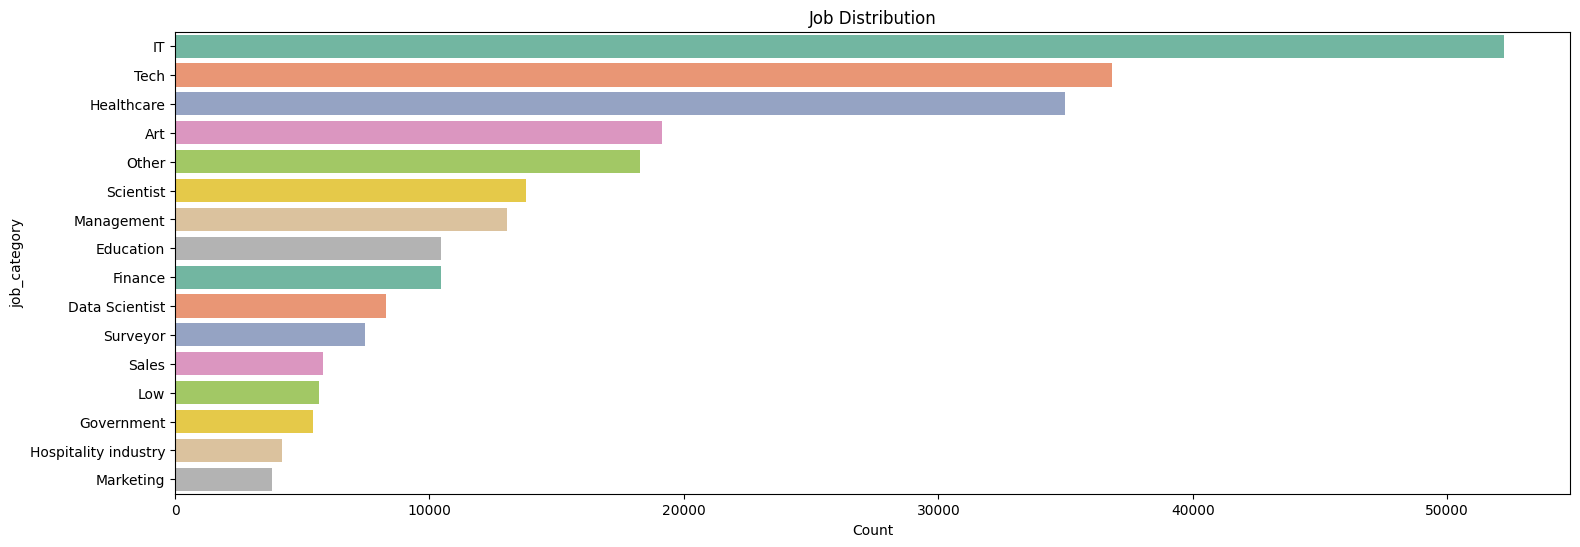

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='job_category', order=df['job_category'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('job_category')
plt.show()


Drop the 'job' column after clustering to categories

In [70]:
df = df.drop(["job"], axis=1)

In [71]:
df.to_pickle('ML_fraud_detection_2.pkl')

In [72]:
df = pd.read_pickle('ML_fraud_detection_2.pkl')

In [73]:
df['state'].value_counts()

state
ny    86426
pa    59375
nj    38751
ma    27380
ct    16005
nh     6630
me     6555
vt     4380
ri     4280
Name: count, dtype: int64

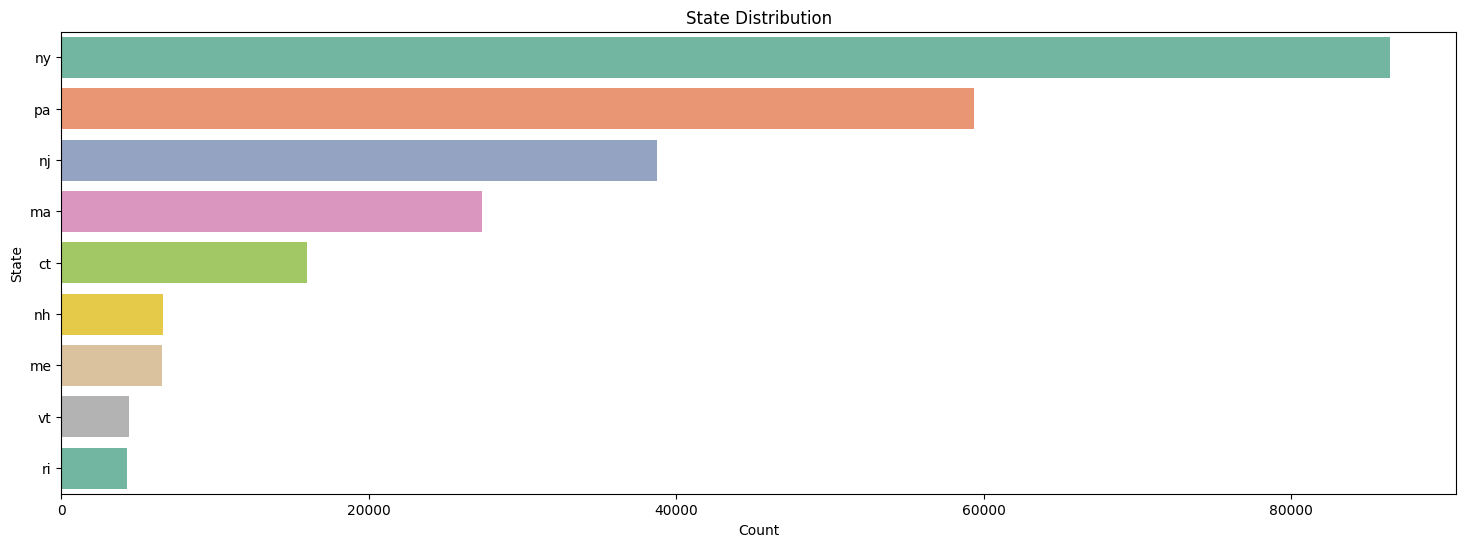

In [74]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='state', order=df['state'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('State Distribution')
plt.xlabel('Count')
plt.ylabel('State')

plt.show()

category/string data

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   first          249782 non-null  category      
 1   last           249782 non-null  category      
 2   gender         249782 non-null  category      
 3   street         249782 non-null  category      
 4   city           249782 non-null  category      
 5   state          249782 non-null  category      
 6   zip            249782 non-null  int64         
 7   lat            249782 non-null  float64       
 8   long           249782 non-null  float64       
 9   city_pop       249782 non-null  int64         
 10  dob            249782 non-null  category      
 11  acct_num       249782 non-null  int64         
 12  profile        249782 non-null  category      
 13  trans_num      249782 non-null  category      
 14  trans_date     249782 non-null  datetime64[ns]
 15  tr

In [76]:
cols_to_convert = ['first', 'last', 'street', 'city', 'merchant']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('string'))

In [77]:
cols_to_convert = ['job_category', 'issuer']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('category'))

-------------------

In [78]:
df['profile'] = df['profile'].str.replace('json', '')
df['profile']

185        young adults female urban 
186        young adults female urban 
187        young adults female urban 
188        young adults female urban 
189        young adults female urban 
                      ...            
1364531       adults 50up male urban 
1364532       adults 50up male urban 
1364533       adults 50up male urban 
1364534       adults 50up male urban 
1364535       adults 50up male urban 
Name: profile, Length: 249782, dtype: object

In [79]:
# Function to extract "adults" or "young_adults"
def extract_category(filename):
    if 'young adults' in filename:
        return 'young adults'
    else:
        return 'adults'

# Apply the function to create a new column
df['age_category'] = df['profile'].apply(extract_category)

In [80]:
df['age_category'].value_counts()

age_category
adults          219359
young adults     30423
Name: count, dtype: int64

In [81]:
# Function to extract "urban" or "rural"
def extract_category(filename):
    if 'urban' in filename:
        return 'urban'
    else:
        return 'rural'

# Apply the function to create a new column
df['location'] = df['profile'].apply(extract_category)

In [82]:
 df['location'].value_counts()

location
urban    236868
rural     12914
Name: count, dtype: int64

In [83]:
# Function to extract "50up" or "2550"
def extract_category(filename):
    if '50up' in filename:
        return '50up'
    else:
        return '2550'

# Apply the function to create a new column
df['profile_category'] = df['profile'].apply(extract_category)

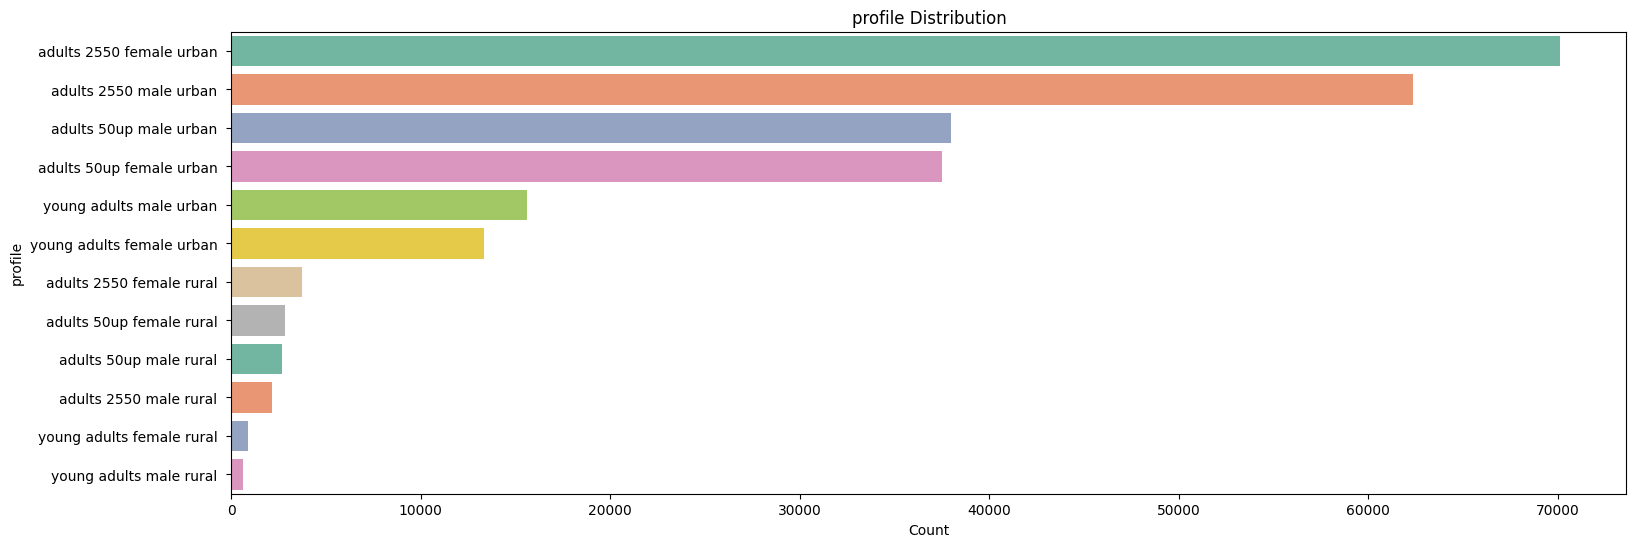

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='profile', order=df['profile'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('profile Distribution')
plt.xlabel('Count')
plt.ylabel('profile')
plt.show()

In [85]:
df[['profile','profile_category', 'location','age_category']]

profile profile_category location  age_category
185      young adults female urban              2550    urban  young adults
186      young adults female urban              2550    urban  young adults
187      young adults female urban              2550    urban  young adults
188      young adults female urban              2550    urban  young adults
189      young adults female urban              2550    urban  young adults
...                             ...              ...      ...           ...
1364531     adults 50up male urban              50up    urban        adults
1364532     adults 50up male urban              50up    urban        adults
1364533     adults 50up male urban              50up    urban        adults
1364534     adults 50up male urban              50up    urban        adults
1364535     adults 50up male urban              50up    urban        adults

[249782 rows x 4 columns]

In [86]:
# Compute category frequencies
df['category'].value_counts()

category
shopping net      129310
shopping pos      119067
misc pos             538
grocery pos          315
misc net             182
gas transport        103
entertainment         52
kids pets             52
home                  37
food dining           36
personal care         29
health fitness        25
grocery net           22
travel                14
Name: count, dtype: int64

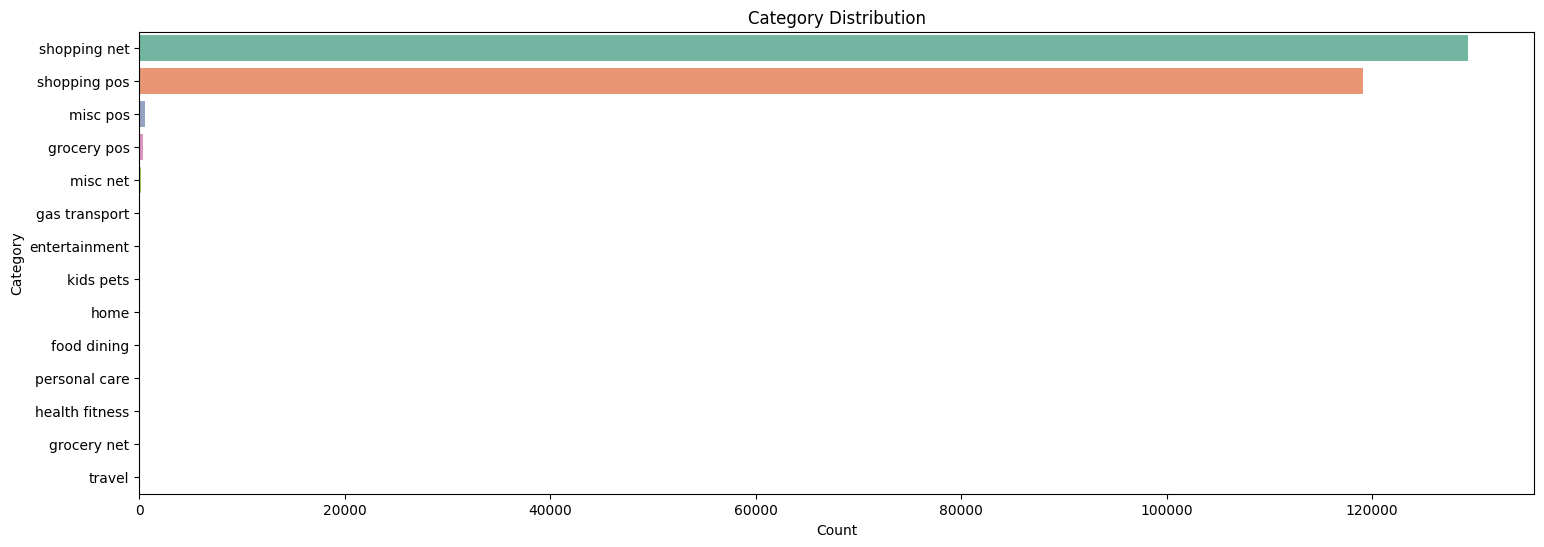

In [87]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

Changing values

In [88]:
# Define bins and labels
bins = [0, 10, 100, 1000, 5000, float('inf')]  # Define bin edges
labels = ['<10', '10-100', '100-1000', '1000-5000', '>5000']  # Define labels

# Create a new column for amount range
df['amt_range(USD)'] = pd.cut(df['amt'], bins=bins, labels=labels, right=False)

# Count occurrences of each range
amount_distribution = df['amt_range(USD)'].value_counts().reset_index()
amount_distribution.columns = ['amt_range(USD)', 'count']

# Display result
print(amount_distribution)


  amt_range(USD)   count
0         10-100  123322
1            <10   84647
2       100-1000   40753
3      1000-5000    1034
4          >5000      26


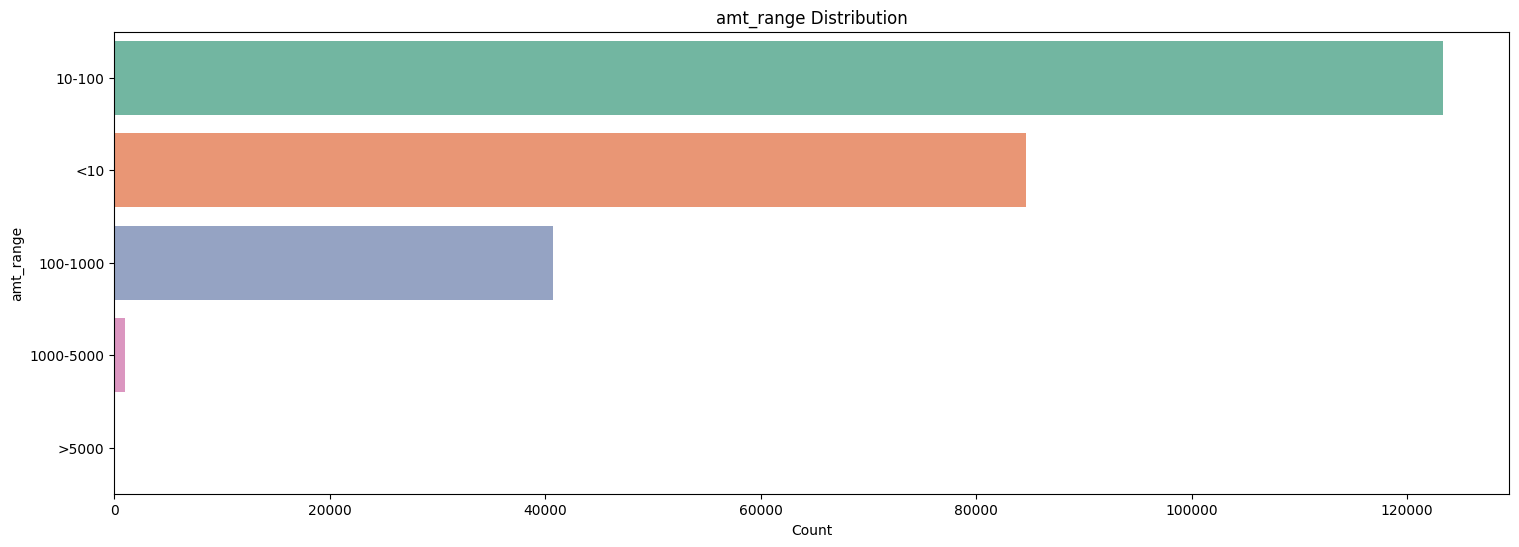

In [89]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, y='amt_range(USD)', order=df['amt_range(USD)'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('amt_range Distribution')
plt.xlabel('Count')
plt.ylabel('amt_range')
plt.show()

Drop the 'amt' column after clustering to categories

In [90]:
df = df.drop(["amt"], axis=1)

In [91]:
for col in df:
    print(col)
    print(df[col].value_counts())

first
first
michael    4816
david      4249
james      3382
john       3118
joseph     3092
           ... 
hayley       23
doris        22
steve        22
riley        21
martin       20
Name: count, Length: 550, dtype: Int64
last
last
smith       4222
johnson     3885
williams    3309
jones       3262
brown       2752
            ... 
jennings      21
cooke         21
strong        20
rollins       17
hurley         7
Name: count, Length: 803, dtype: Int64
gender
gender
f    128414
m    121368
Name: count, dtype: int64
street
street
788 lawrence rest                  206
22354 stephanie club apt  971      205
893 gill ranch                     205
7896 erin lake suite 745           203
61750 carl springs                 201
                                  ... 
90629 jonathan islands apt  059      7
343 walker row                       7
501 richard dam suite 508            7
13499 mcgee lane suite 436           5
1853 smith roads apt  743            4
Name: count, Length: 3170, dty

In [92]:
df.to_pickle('ML_fraud_detection_3.pkl')

### Age Groups

In [93]:
from datetime import datetime

# Convert 'dob' column to datetime format
df['dob'] = pd.to_datetime(df['dob'])

# Calculate age by subtracting DOB from the current date and converting to years
df['age'] = df['dob'].apply(lambda x: (datetime.now() - x).days // 365)

In [94]:
# Categorize the ages into bins with labels
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 24, 34, 44, 69, float('inf')], labels=['<18', '18-24', '25-34', '35-44', '45-69', '>70'], right=False)

In [95]:
# Aggregate the age groups
age_group_aggregation = df.groupby('age_range').size().reset_index(name='count')

age_group_aggregation

age_range  count
0       <18   1424
1     18-24  16757
2     25-34  54227
3     35-44  55828
4     45-69  89972
5       >70  31574

In [96]:
# Categorize the ages into bins with labels
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 24, 34, 44, 69, float('inf')], labels=['<18', '18-24', '25-34', '35-44', '45-69', '>70'], right=False)

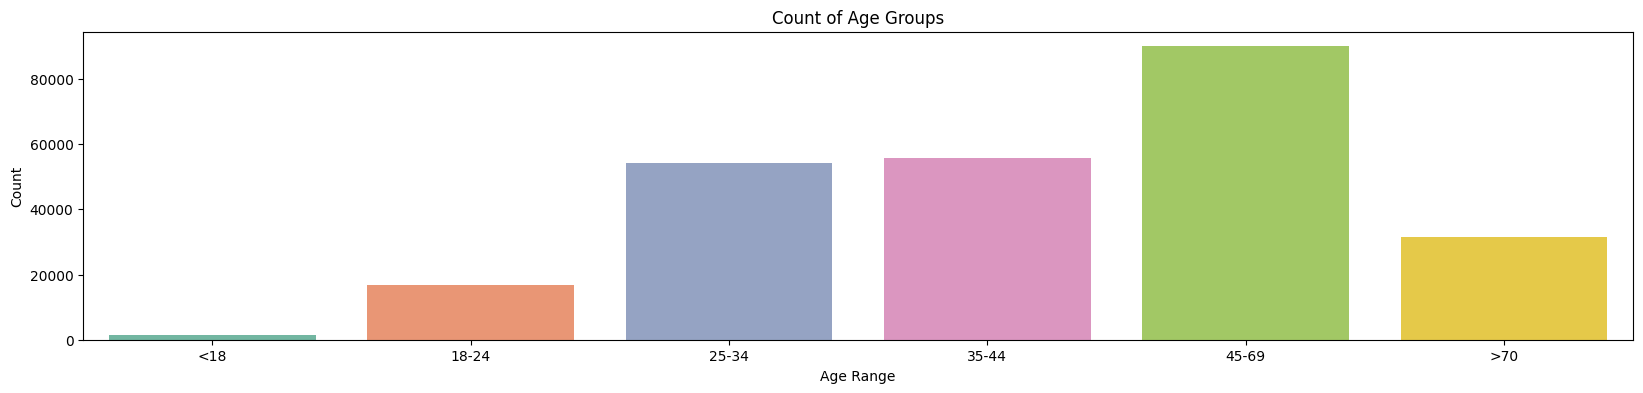

In [97]:
# Create a countplot with a color palette
plt.figure(figsize=(20, 4))
sns.countplot(x='age_range', data=df, order=['<18', '18-24', '25-34', '35-44', '45-69', '>70'], palette='Set2')

# Add title and labels
plt.title('Count of Age Groups')
plt.xlabel('Age Range')
plt.ylabel('Count')

# Show the plot
plt.show()


Drop the 'amt' column after clustering to categories

In [98]:
# df = df.drop(["dob", "age"], axis=1)

In [99]:
df = df.drop(["dob"], axis=1)

In [100]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# Display result
print(age_group_aggregation)

   age_range  is_fraud  count
0        <18         0   1424
1        <18         1      0
2      18-24         0  16629
3      18-24         1    128
4      25-34         0  53925
5      25-34         1    302
6      35-44         0  55635
7      35-44         1    193
8      45-69         0  89491
9      45-69         1    481
10       >70         0  31287
11       >70         1    287


In [101]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# Calculate the total count per age_range
total_counts = age_group_aggregation.groupby('age_range')['count'].transform('sum')

# Calculate the percentage of fraud cases (is_fraud == 1)
age_group_aggregation['fraud_percentage'] = ((age_group_aggregation['count'] / total_counts) * 100)

# Filter only fraud cases (is_fraud == 1) for displaying fraud percentage
fraud_percentage_df = age_group_aggregation[age_group_aggregation['is_fraud'] == 1][['age_range', 'fraud_percentage']]

# Display result
print(fraud_percentage_df)


   age_range  fraud_percentage
1        <18          0.000000
3      18-24          0.763860
5      25-34          0.556918
7      35-44          0.345705
9      45-69          0.534611
11       >70          0.908976


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   first             249782 non-null  string        
 1   last              249782 non-null  string        
 2   gender            249782 non-null  category      
 3   street            249782 non-null  string        
 4   city              249782 non-null  string        
 5   state             249782 non-null  category      
 6   zip               249782 non-null  int64         
 7   lat               249782 non-null  float64       
 8   long              249782 non-null  float64       
 9   city_pop          249782 non-null  int64         
 10  acct_num          249782 non-null  int64         
 11  profile           249782 non-null  object        
 12  trans_num         249782 non-null  category      
 13  trans_date        249782 non-null  datetime64[ns]
 14  trans_

In [103]:
# Define population categories
def classify_city(population):
    if population >= 1_000_000:
        return 'Metropolis'
    elif population >= 100_000:
        return 'City'
    elif population >= 10_000:
        return 'Town'
    elif population >= 1_000:
        return 'Village'
    else:
        return 'Hamlet'

# Apply classification to city_pop column
df['city_category'] = df['city_pop'].apply(classify_city)

df['city_category'].value_counts()

city_category
Town          132534
Village        47168
City           36377
Metropolis     30885
Hamlet          2818
Name: count, dtype: int64

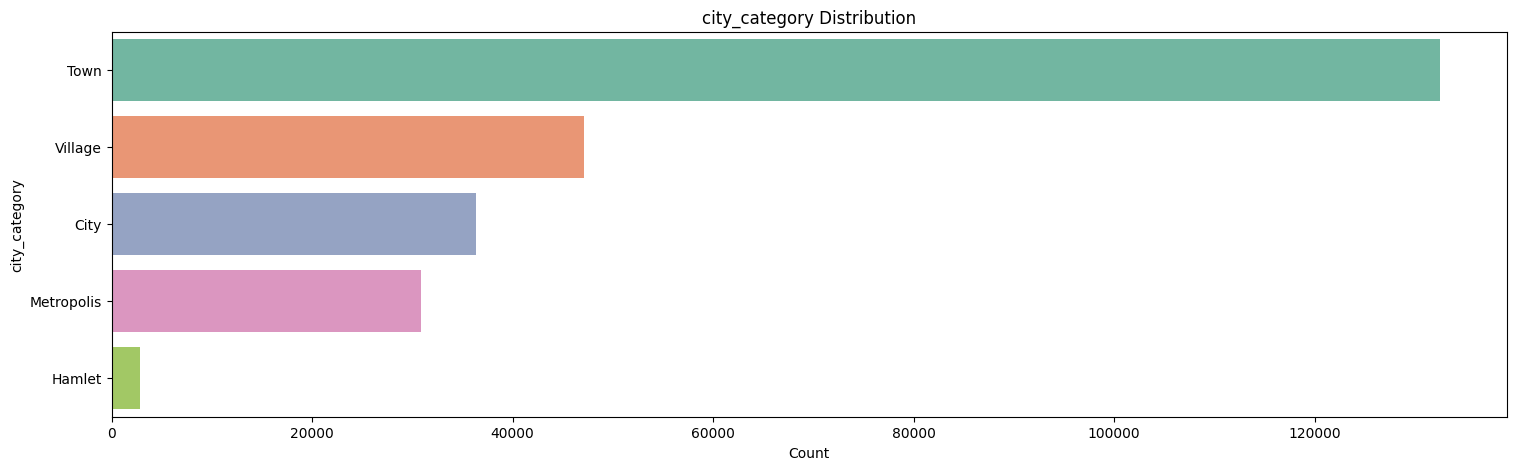

In [104]:
plt.figure(figsize=(18, 5))
sns.countplot(data=df, y='city_category', order=df['city_category'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('city_category Distribution')
plt.xlabel('Count')
plt.ylabel('city_category')
plt.show()

Drop the 'city_pop' column after clustering to categories

In [105]:
df = df.drop(["city_pop"], axis=1)

In [106]:
# Fix format by replacing spaces with colons
df['trans_time'] = df['trans_time'].str.replace(' ', ':')

In [107]:
df['trans_time'].value_counts()

trans_time
17:37:00    15
16:38:57    14
16:22:36    13
21:47:23    13
23:13:01    13
            ..
21:11:25     1
19:36:21     1
13:56:15     1
16:11:52     1
07:56:19     1
Name: count, Length: 79174, dtype: int64

In [108]:
# Convert 'trans_time' to datetime (only extract hour)
df['hour'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.hour

# Define time categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function
df['time_category'] = df['hour'].apply(categorize_time)


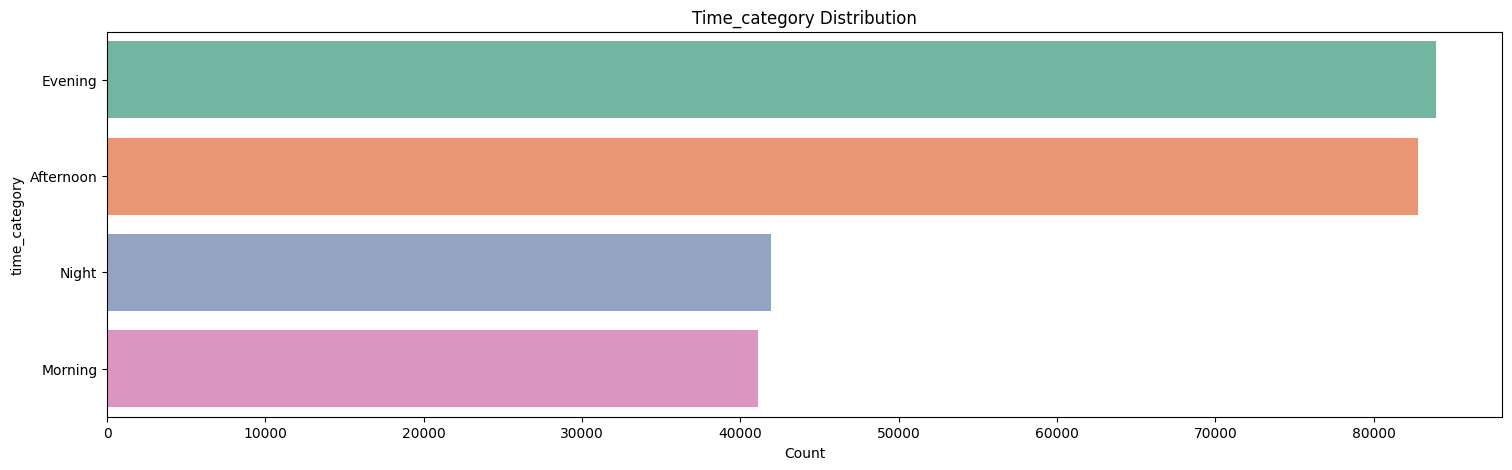

In [109]:
plt.figure(figsize=(18, 5))
sns.countplot(data=df, y='time_category', order=df['time_category'].value_counts().index, palette='Set2')  # Sort by frequency

plt.title('Time_category Distribution')
plt.xlabel('Count')
plt.ylabel('time_category')
plt.show()

Drop the 'trans_time' column after clustering to categories

In [110]:
df = df.drop(["trans_time"], axis=1)

In [111]:
df = df.drop(["hour"], axis=1)

In [112]:
df.to_pickle('ML_fraud_detection_4.pkl')

In [185]:
df = pd.read_pickle('ML_fraud_detection_4.pkl')

In [113]:
for col in df:
    print(col)
    print(df[col].value_counts())

first
first
michael    4816
david      4249
james      3382
john       3118
joseph     3092
           ... 
hayley       23
doris        22
steve        22
riley        21
martin       20
Name: count, Length: 550, dtype: Int64
last
last
smith       4222
johnson     3885
williams    3309
jones       3262
brown       2752
            ... 
jennings      21
cooke         21
strong        20
rollins       17
hurley         7
Name: count, Length: 803, dtype: Int64
gender
gender
f    128414
m    121368
Name: count, dtype: int64
street
street
788 lawrence rest                  206
22354 stephanie club apt  971      205
893 gill ranch                     205
7896 erin lake suite 745           203
61750 carl springs                 201
                                  ... 
90629 jonathan islands apt  059      7
343 walker row                       7
501 richard dam suite 508            7
13499 mcgee lane suite 436           5
1853 smith roads apt  743            4
Name: count, Length: 3170, dty

-----------------

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   first             249782 non-null  string        
 1   last              249782 non-null  string        
 2   gender            249782 non-null  category      
 3   street            249782 non-null  string        
 4   city              249782 non-null  string        
 5   state             249782 non-null  category      
 6   zip               249782 non-null  int64         
 7   lat               249782 non-null  float64       
 8   long              249782 non-null  float64       
 9   acct_num          249782 non-null  int64         
 10  profile           249782 non-null  category      
 11  trans_num         249782 non-null  category      
 12  trans_date        249782 non-null  datetime64[ns]
 13  category          249782 non-null  category      
 14  is_fra

In [115]:
cols_to_convert = ['profile', 'city_category', 'time_category', 'profile_category', 'location', 'age_category']
df[cols_to_convert] = df[cols_to_convert].apply(lambda x: x.astype('category'))

In [196]:
df = df.drop(['year', 'month', 'quarter'], axis=1)

In [116]:
# 'string' Columns
string_to_df = df.select_dtypes(include=['string']).columns

In [117]:
df_text = df[string_to_df]
df_text.head()

first     last                      street     city  \
185  kristina  gilbert  59404 steve mews suite 580  boonton   
186  kristina  gilbert  59404 steve mews suite 580  boonton   
187  kristina  gilbert  59404 steve mews suite 580  boonton   
188  kristina  gilbert  59404 steve mews suite 580  boonton   
189  kristina  gilbert  59404 steve mews suite 580  boonton   

                                   merchant  
185  fraud stanton  jakubowski and baumbach  
186                      fraud predovic inc  
187                     fraud heathcote llc  
188         fraud little  gutmann and lynch  
189                fraud gleason macejkovic

In [119]:
df_text.to_pickle('df_text.pkl')

In [7]:
df_text = pd.read_pickle('df_text.pkl')

In [200]:
# 'int' Columns
int_to_df = df.select_dtypes(include=['int64', 'float64']).columns

In [201]:
df_num = df[int_to_df]
df_num.head()

zip      lat    long      acct_num  is_fraud  merch_lat  merch_long  \
185  7005  40.9115 -74.414  826475243361         0  41.497516  -74.258973   
186  7005  40.9115 -74.414  826475243361         0  40.661566  -73.849180   
187  7005  40.9115 -74.414  826475243361         0  41.655939  -75.234739   
188  7005  40.9115 -74.414  826475243361         0  40.062355  -74.923742   
189  7005  40.9115 -74.414  826475243361         0  41.285106  -74.645948   

     day  age  
185    9   22  
186   11   22  
187   23   22  
188   24   22  
189    8   22

In [122]:
df_num.to_pickle('df_num.pkl')

In [8]:
df_num = pd.read_pickle('df_num.pkl')

In [198]:
# 'int' Columns
cat_to_df = df.select_dtypes(include=['category', 'bool']).columns

In [199]:
df_category = df[cat_to_df]
df_category.head()

gender state                     profile  \
185      f    nj  young adults female urban    
186      f    nj  young adults female urban    
187      f    nj  young adults female urban    
188      f    nj  young adults female urban    
189      f    nj  young adults female urban    

                            trans_num      category  is_weekend  \
185  d551518dc69441dae803bb711b97c9ee  shopping net        True   
186  ec83997c27461bf8a1a989021e4df9fe  shopping net        True   
187  acdb36bf499af78ea13b2e8772da0d0c  shopping net        True   
188  0e5ec24d278b397d21675e46042778c6  shopping net        True   
189  c9d221acd26a21dfce4b7f79fe0dfcc2  shopping net        True   

     is_suspicious issuer job_category  age_category location  \
185          False   Visa    Scientist  young adults    urban   
186          False   Visa    Scientist  young adults    urban   
187          False   Visa    Scientist  young adults    urban   
188          False   Visa    Scientist  young adults    urban   
189          False   Visa    Scientist  young adults    urban   

    profile_category amt_range(USD) age_range city_category time_category  
185             2550         10-100     18-24          Town       Evening  
186             2550         10-100     18-24          Town       Evening  
187             2550            <10     18-24          Town     Afternoon  
188             2550            <10     18-24          Town       Evening  
189             2550            <10     18-24          Town     Afternoon

In [125]:
df.to_pickle('df_category.pkl')

In [9]:
df_category = pd.read_pickle('df_category.pkl')

Saving Manipulated data

In [126]:
df.to_csv('final_data_prep_fraud_detection_copy')

# EDA - Explenatory Data Analysis

In [127]:
df_text.describe()

first    last             street      city               merchant
count    249782  249782             249782    249782                 249782
unique      550     803               3170      1272                    481
top     michael   smith  788 lawrence rest  brooklyn  fraud kerluke abshire
freq       4816    4222                206     11490                   2697

In [128]:
df_num.describe()

zip            lat           long      acct_num  \
count  249782.000000  249782.000000  249782.000000  2.497820e+05   
mean    10478.819290      41.339300     -74.434149  4.994804e+11   
std      5247.064139       1.188322       2.418442  2.870267e+11   
min      1002.000000      39.021900     -80.499300  3.585832e+08   
25%      6790.000000      40.583900     -75.391800  2.501070e+11   
50%     10804.000000      40.862100     -74.005400  5.016438e+11   
75%     14615.000000      42.153200     -73.179600  7.527009e+11   
max     19611.000000      46.924800     -67.407300  9.999583e+11   

            is_fraud      merch_lat     merch_long      year     month  \
count  249782.000000  249782.000000  249782.000000  249782.0  249782.0   
mean        0.005569      41.340106     -74.434125    2019.0      11.0   
std         0.074417       1.319480       2.487703       0.0       0.0   
min         0.000000      38.050914     -81.462815    2019.0      11.0   
25%         0.000000      40.361485     -75.591588    2019.0      11.0   
50%         0.000000      41.133853     -74.187823    2019.0      11.0   
75%         0.000000      42.149156     -73.010321    2019.0      11.0   
max         1.000000      47.906075     -66.409339    2019.0      11.0   

                 day   quarter            age  
count  249782.000000  249782.0  249782.000000  
mean       16.042001       4.0      45.719275  
std         9.166754       0.0      17.940284  
min         1.000000       4.0      16.000000  
25%         8.000000       4.0      31.000000  
50%        16.000000       4.0      43.000000  
75%        24.000000       4.0      57.000000  
max        30.000000       4.0      97.000000

In [129]:
df_category.describe()

gender   state                    profile  \
count   249782  249782                     249782   
unique       2       9                         12   
top          f      ny  adults 2550 female urban    
freq    128414   86426                      70121   

                               trans_num      category is_weekend  \
count                             249782        249782     249782   
unique                            249782            14          2   
top     0000addfb24ff48ee172d700d65d81c5  shopping net       True   
freq                                   1        129310     213737   

       is_suspicious  issuer job_category age_category location  \
count         249782  249782       249782       249782   249782   
unique             2       7           16            2        2   
top            False    Visa           IT       adults    urban   
freq          201706   66286        52218       219359   236868   

       profile_category amt_range(USD) age_range city_category time_category  
count            249782         249782    249782        249782        249782  
unique                2              5         6             5             4  
top                2550         10-100     45-69          Town       Evening  
freq             168802         123322     89972        132534         83914

# Data Protocol

In [130]:
df_protocol = df.copy()


In [131]:
df_text_copy = df_text.copy()
df_num_copy = df_num.copy()
df_category_copy = df_category.copy()

# Label Encoding

In [132]:
from sklearn.preprocessing import LabelEncoder

# Identify object (categorical) columns
categorical_cols = df_protocol.select_dtypes(include=['object', 'category']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_protocol[col] = le.fit_transform(df_protocol[col])

In [133]:
df_protocol

first     last  gender                      street      city  \
185      kristina  gilbert       0  59404 steve mews suite 580   boonton   
186      kristina  gilbert       0  59404 steve mews suite 580   boonton   
187      kristina  gilbert       0  59404 steve mews suite 580   boonton   
188      kristina  gilbert       0  59404 steve mews suite 580   boonton   
189      kristina  gilbert       0  59404 steve mews suite 580   boonton   
...           ...      ...     ...                         ...       ...   
1364531    isaiah  edwards       1   977 harris place apt  701  catskill   
1364532    isaiah  edwards       1   977 harris place apt  701  catskill   
1364533    isaiah  edwards       1   977 harris place apt  701  catskill   
1364534    isaiah  edwards       1   977 harris place apt  701  catskill   
1364535    isaiah  edwards       1   977 harris place apt  701  catskill   

         state    zip      lat     long      acct_num  ...  issuer  \
185          4   7005  40.9115 -74.4140  826475243361  ...       6   
186          4   7005  40.9115 -74.4140  826475243361  ...       6   
187          4   7005  40.9115 -74.4140  826475243361  ...       6   
188          4   7005  40.9115 -74.4140  826475243361  ...       6   
189          4   7005  40.9115 -74.4140  826475243361  ...       6   
...        ...    ...      ...      ...           ...  ...     ...   
1364531      5  12414  42.2276 -73.8985  846920444376  ...       2   
1364532      5  12414  42.2276 -73.8985  846920444376  ...       2   
1364533      5  12414  42.2276 -73.8985  846920444376  ...       2   
1364534      5  12414  42.2276 -73.8985  846920444376  ...       2   
1364535      5  12414  42.2276 -73.8985  846920444376  ...       2   

         job_category age_category  location  profile_category amt_range(USD)  \
185                13            1         1                 0              0   
186                13            1         1                 0              0   
187                13            1         1                 0              3   
188                13            1         1                 0              3   
189                13            1         1                 0              3   
...               ...          ...       ...               ...            ...   
1364531             7            0         1                 1              1   
1364532             7            0         1                 1              0   
1364533             7            0         1                 1              1   
1364534             7            0         1                 1              0   
1364535             7            0         1                 1              0   

         age  age_range  city_category  time_category  
185       22          0              3              1  
186       22          0              3              1  
187       22          0              3              0  
188       22          0              3              1  
189       22          0              3              0  
...      ...        ...            ...            ...  
1364531   57          3              3              2  
1364532   57          3              3              3  
1364533   57          3              3              3  
1364534   57          3              3              2  
1364535   57          3              3              3  

[249782 rows x 34 columns]

In [222]:
#Type of data 
df_num.dtypes.to_excel ("df_datatype.xlsx", sheet_name='data_types')

#Maximum points 
df_num.max().to_excel("df_max.xlsx", sheet_name='max')

#Minimum points 
df_num.min().to_excel("df_min.xlsx", sheet_name='min')
        
#Isnull values 
df_num.isnull().to_excel("df_isnull.xlsx", sheet_name='isnull')

#unique values 
df_num.nunique().to_excel("df_nunique.xlsx", sheet_name='nunique')

# Descriptive Statistics

Automated reports

### AutoViz

In [117]:
!pip install autoviz

In [4]:
df=pd.read_pickle('final_data_prep_fraud_detection_copy.pkl')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 27)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  8
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4

Number of All Scatter Plots = 10


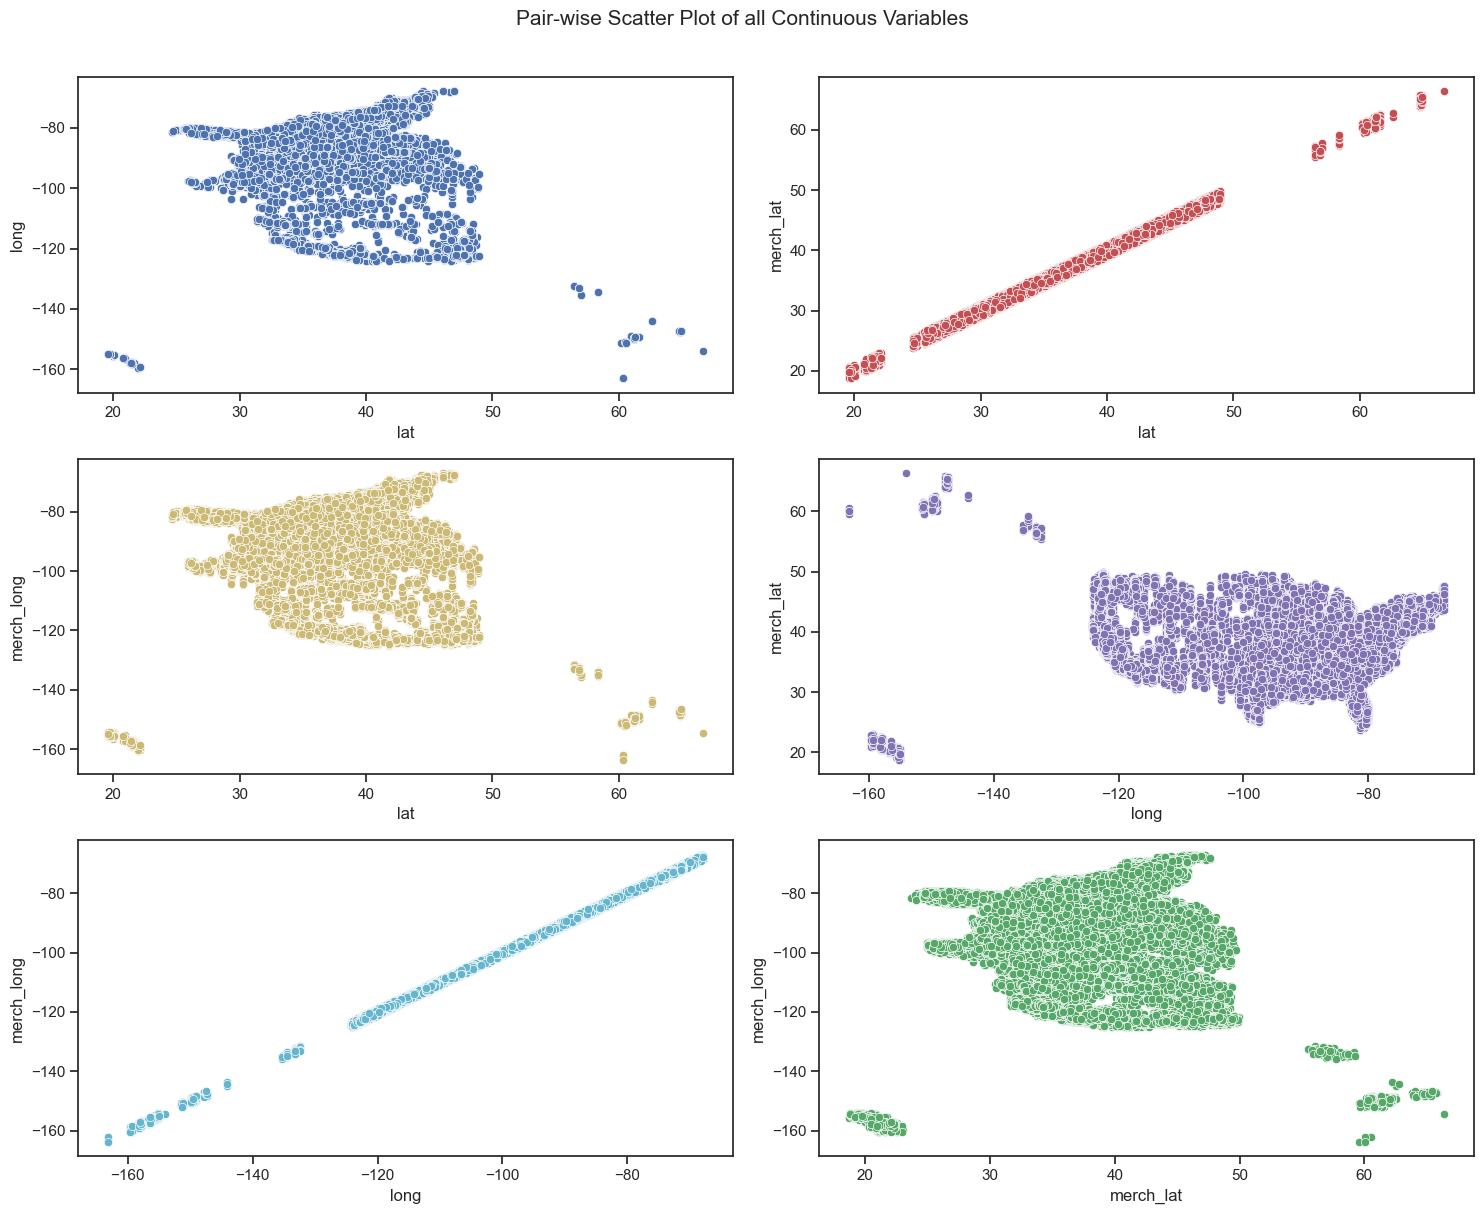

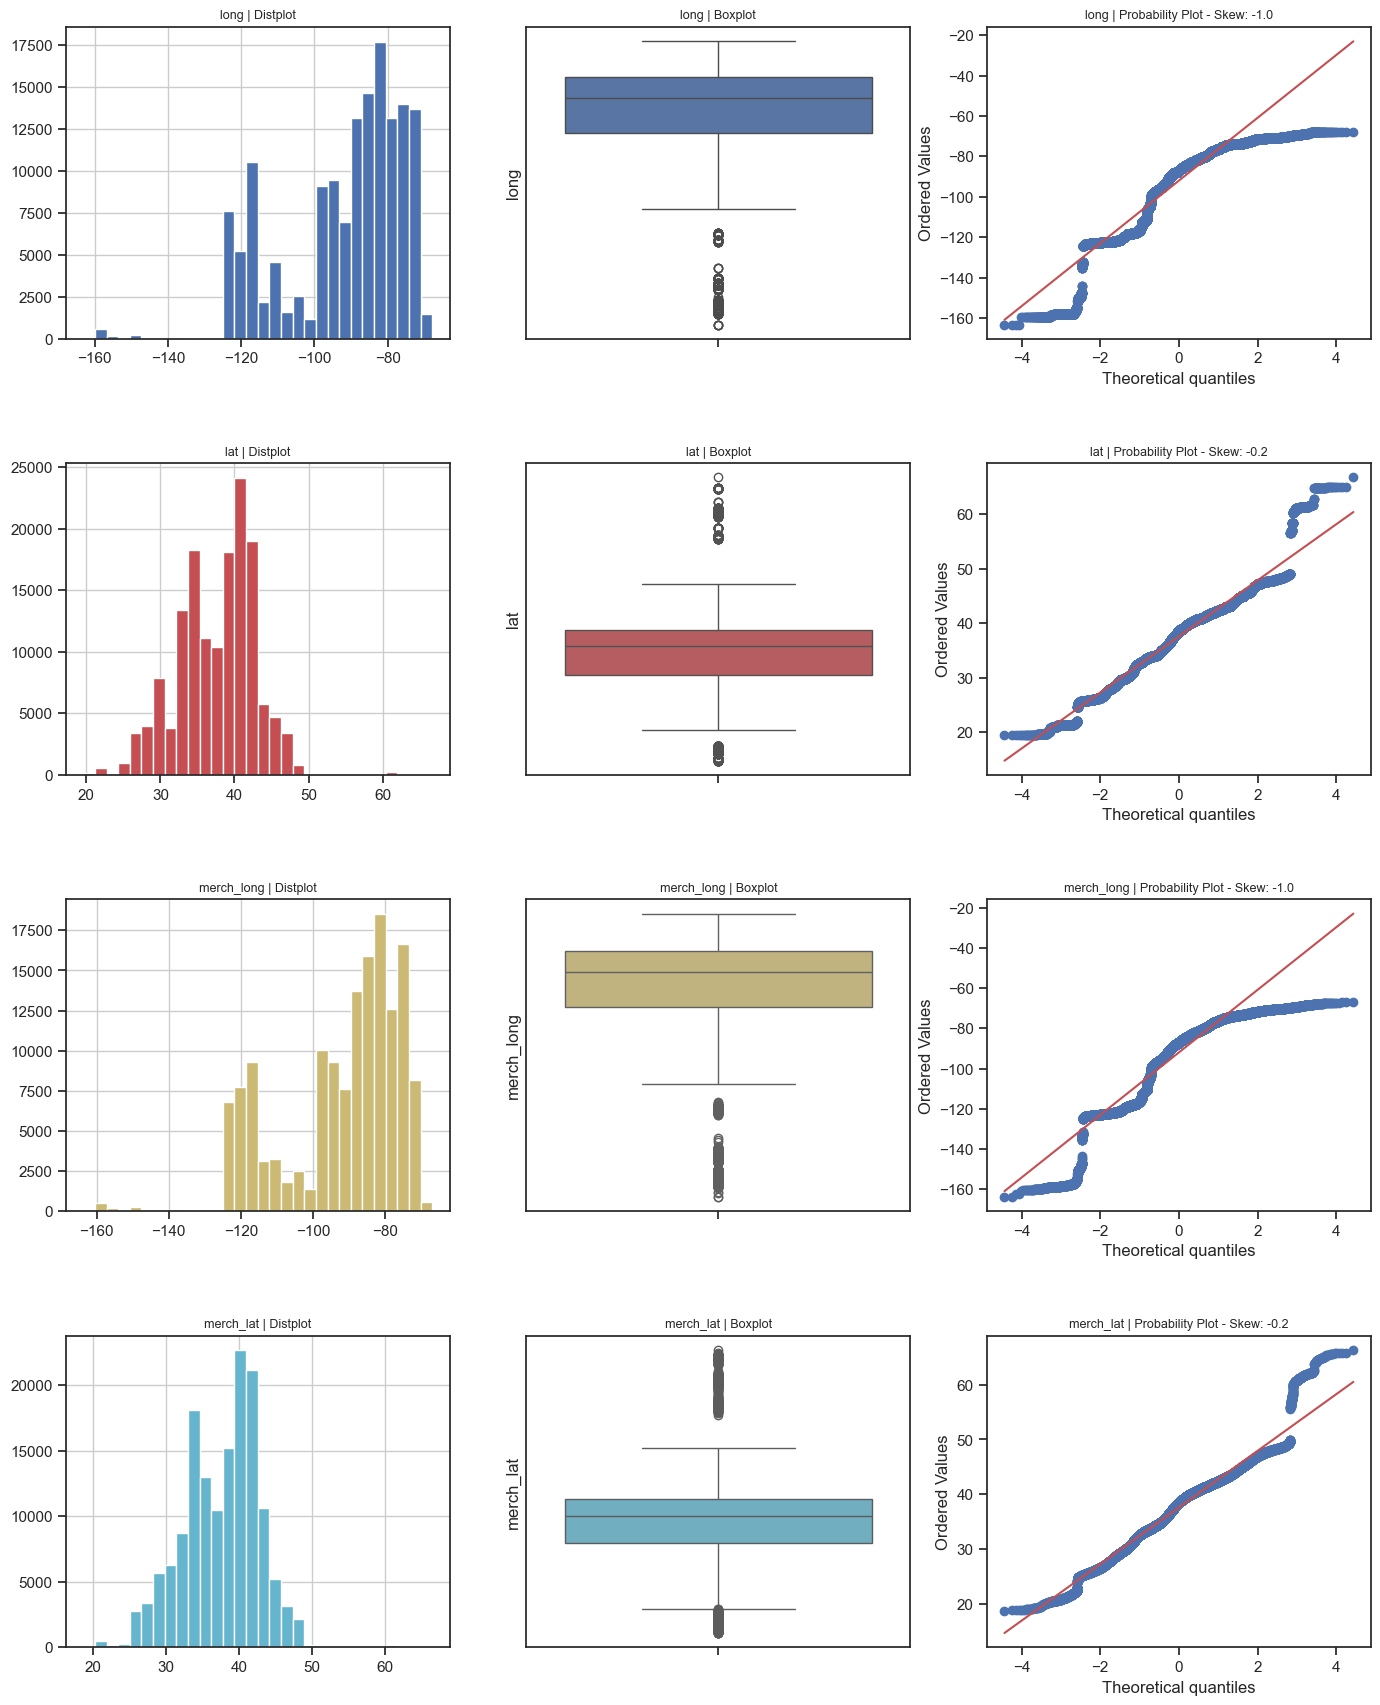

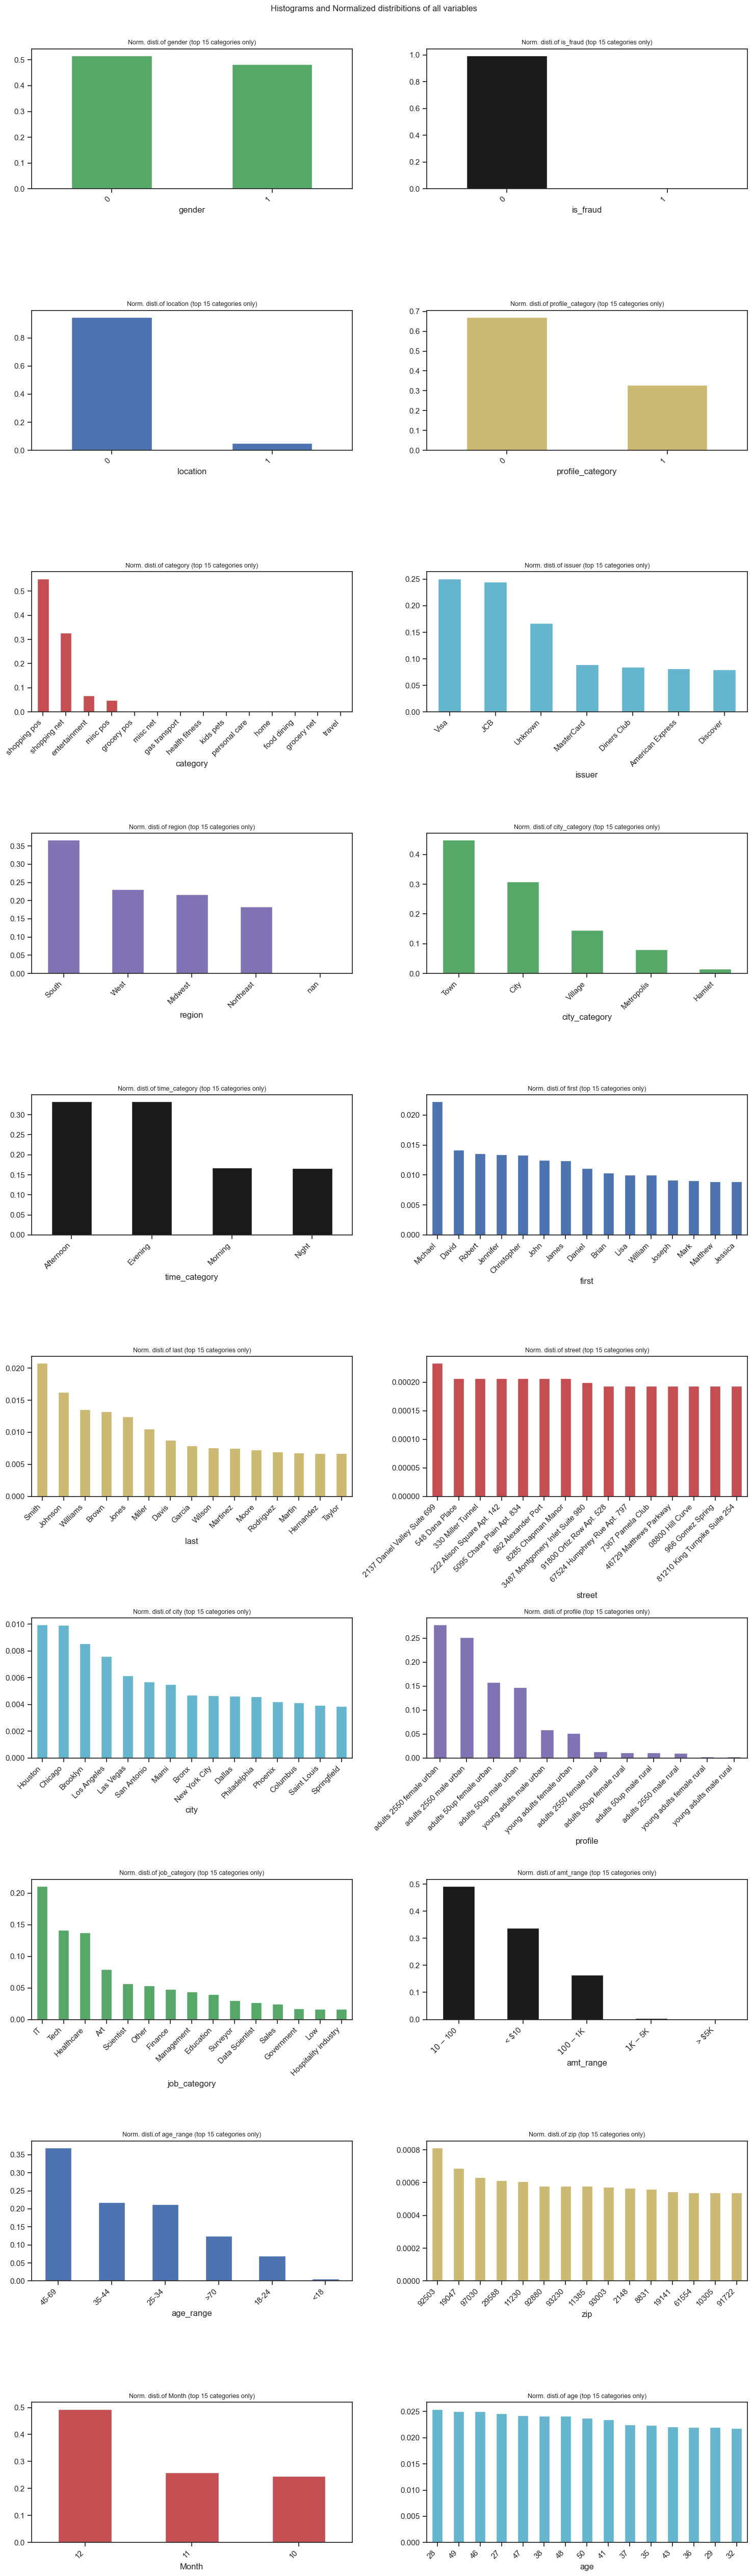

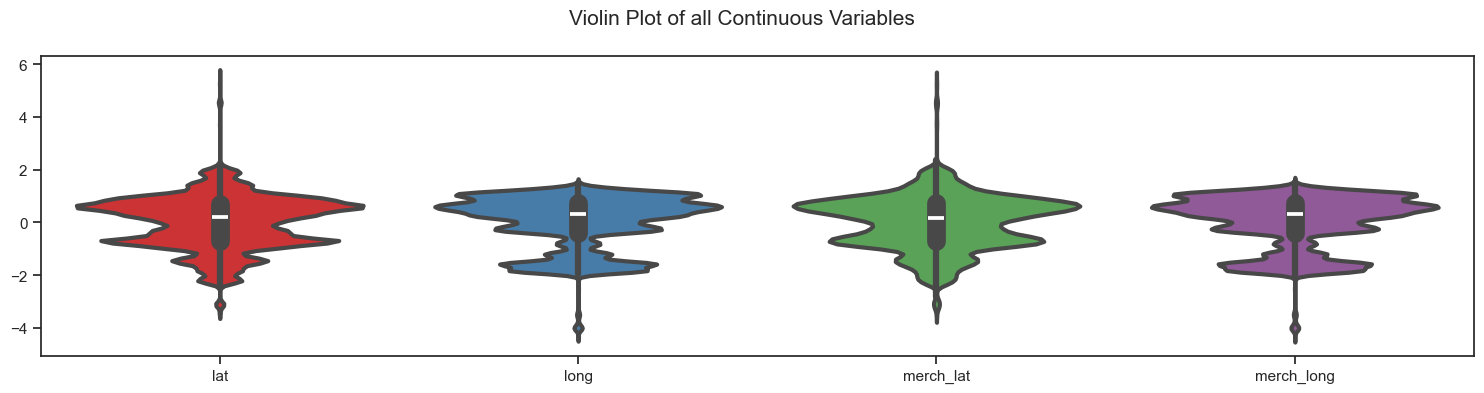

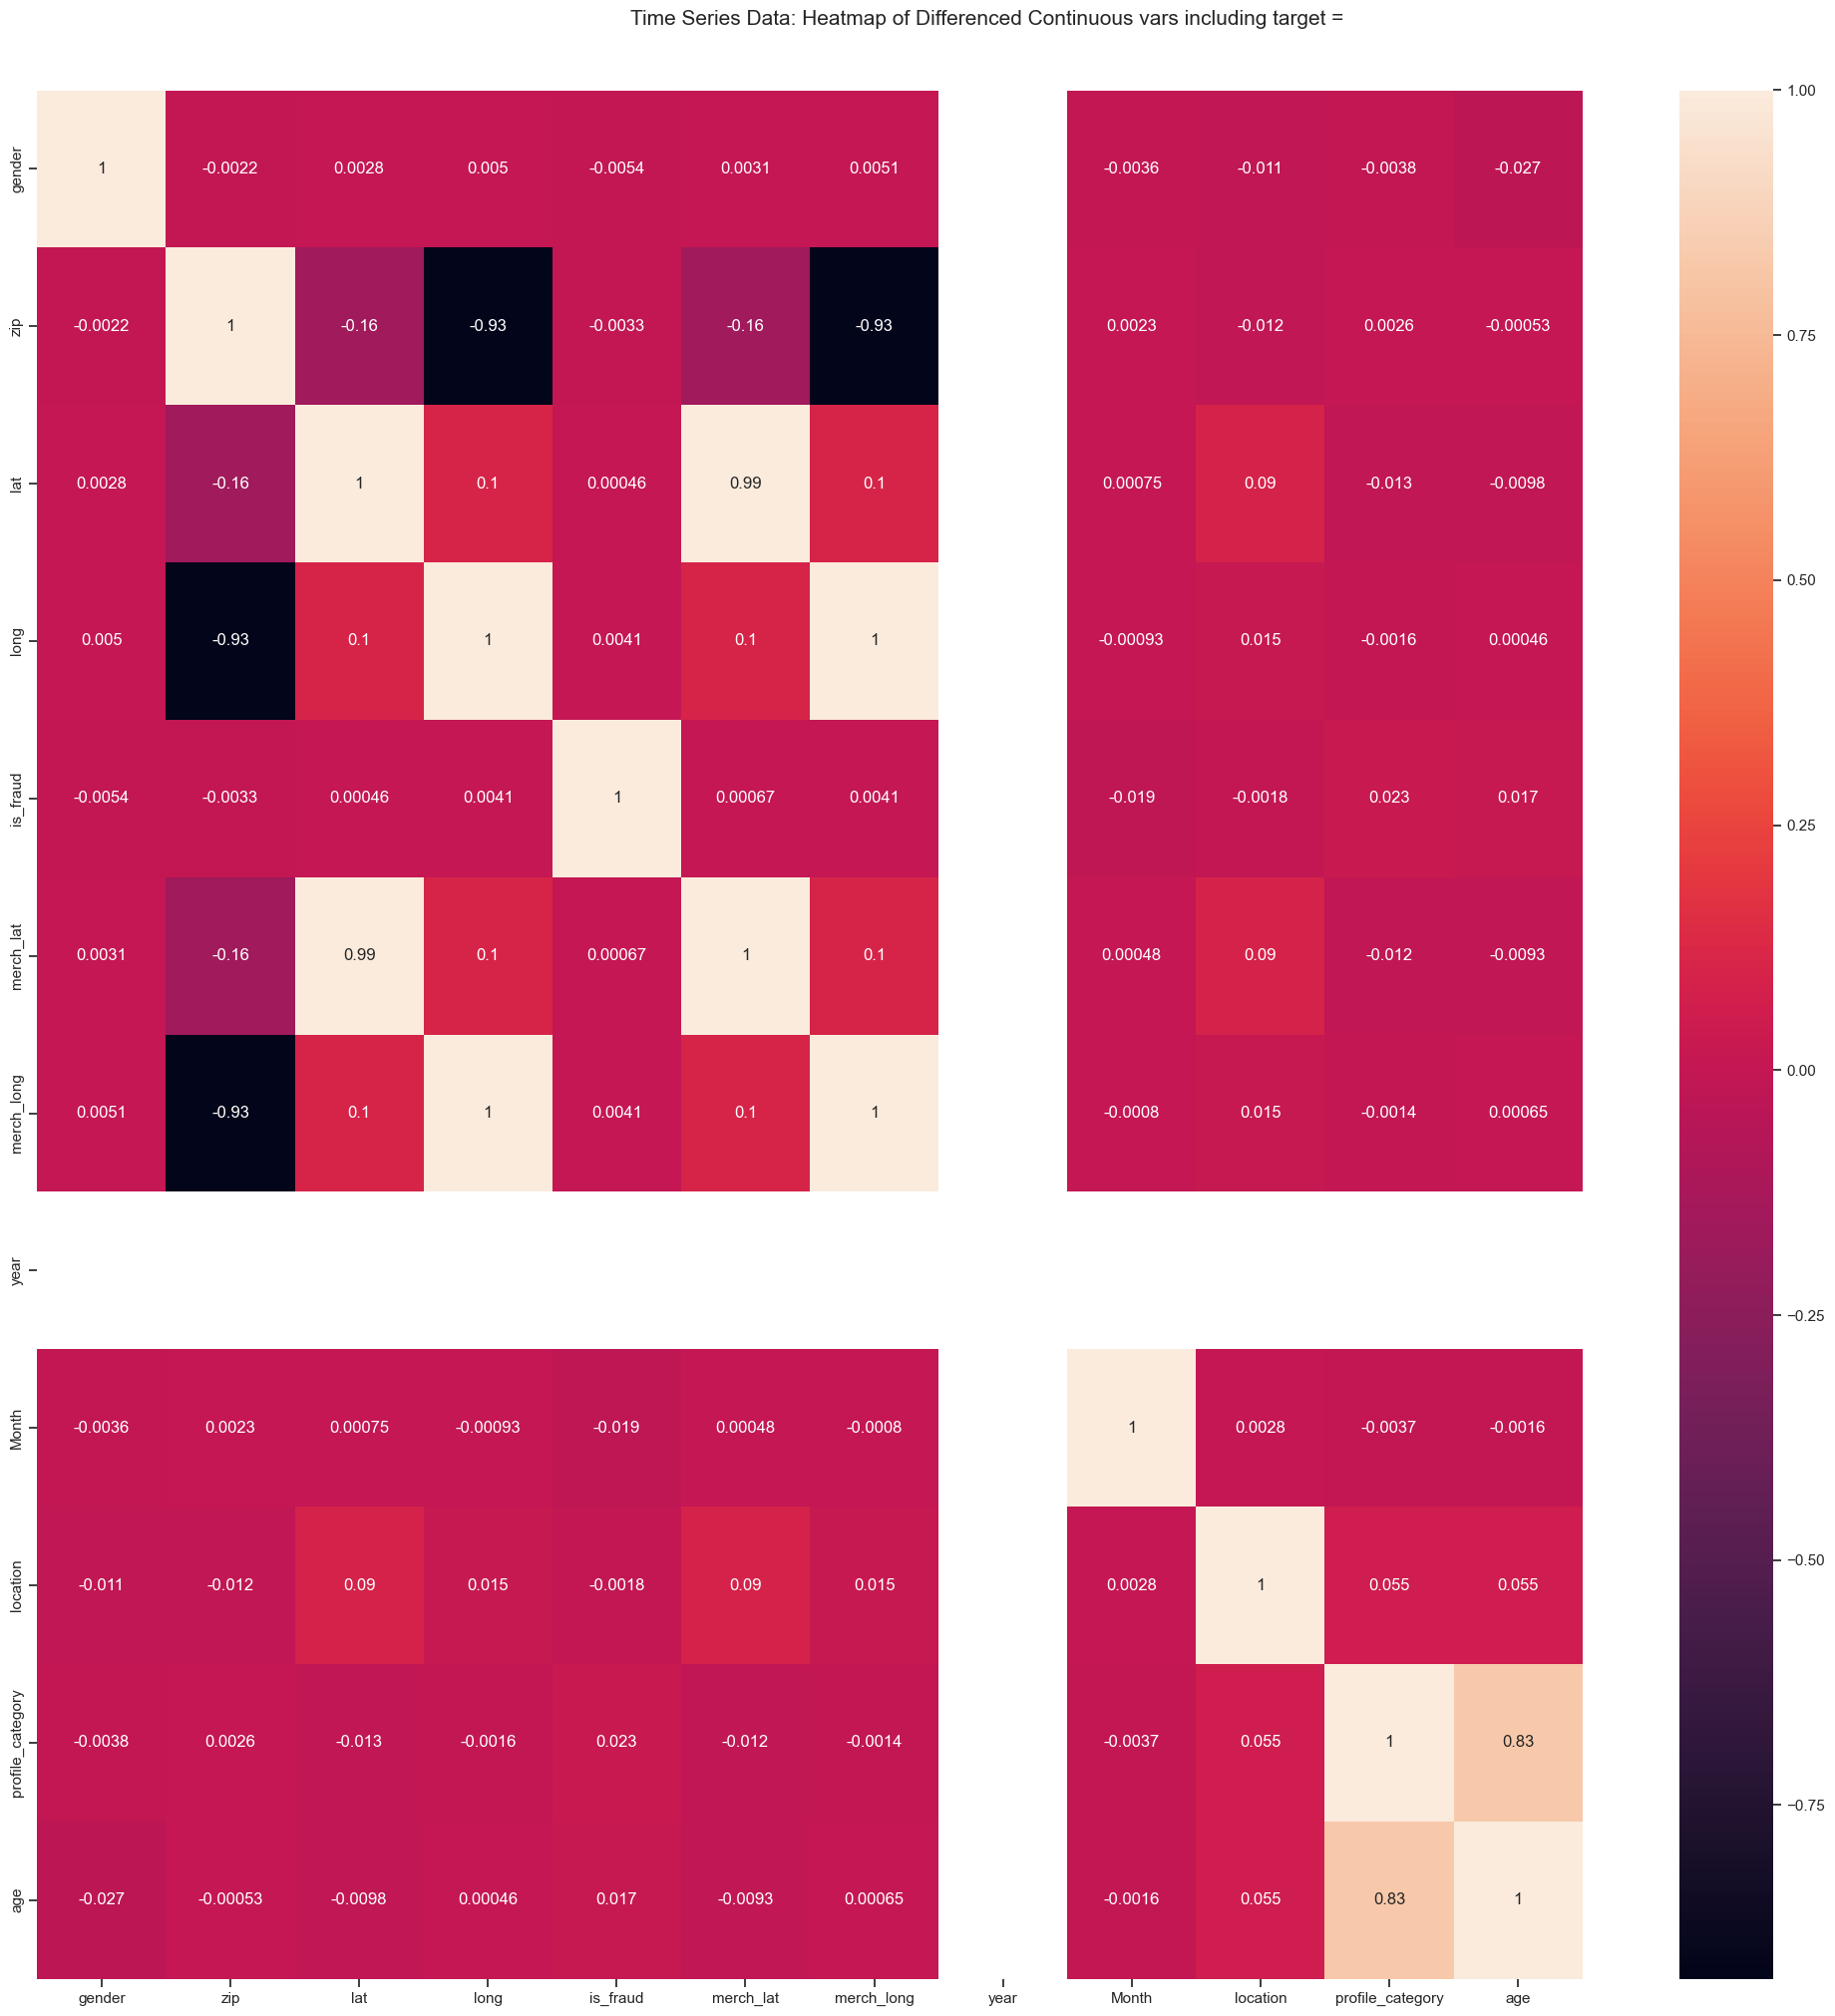

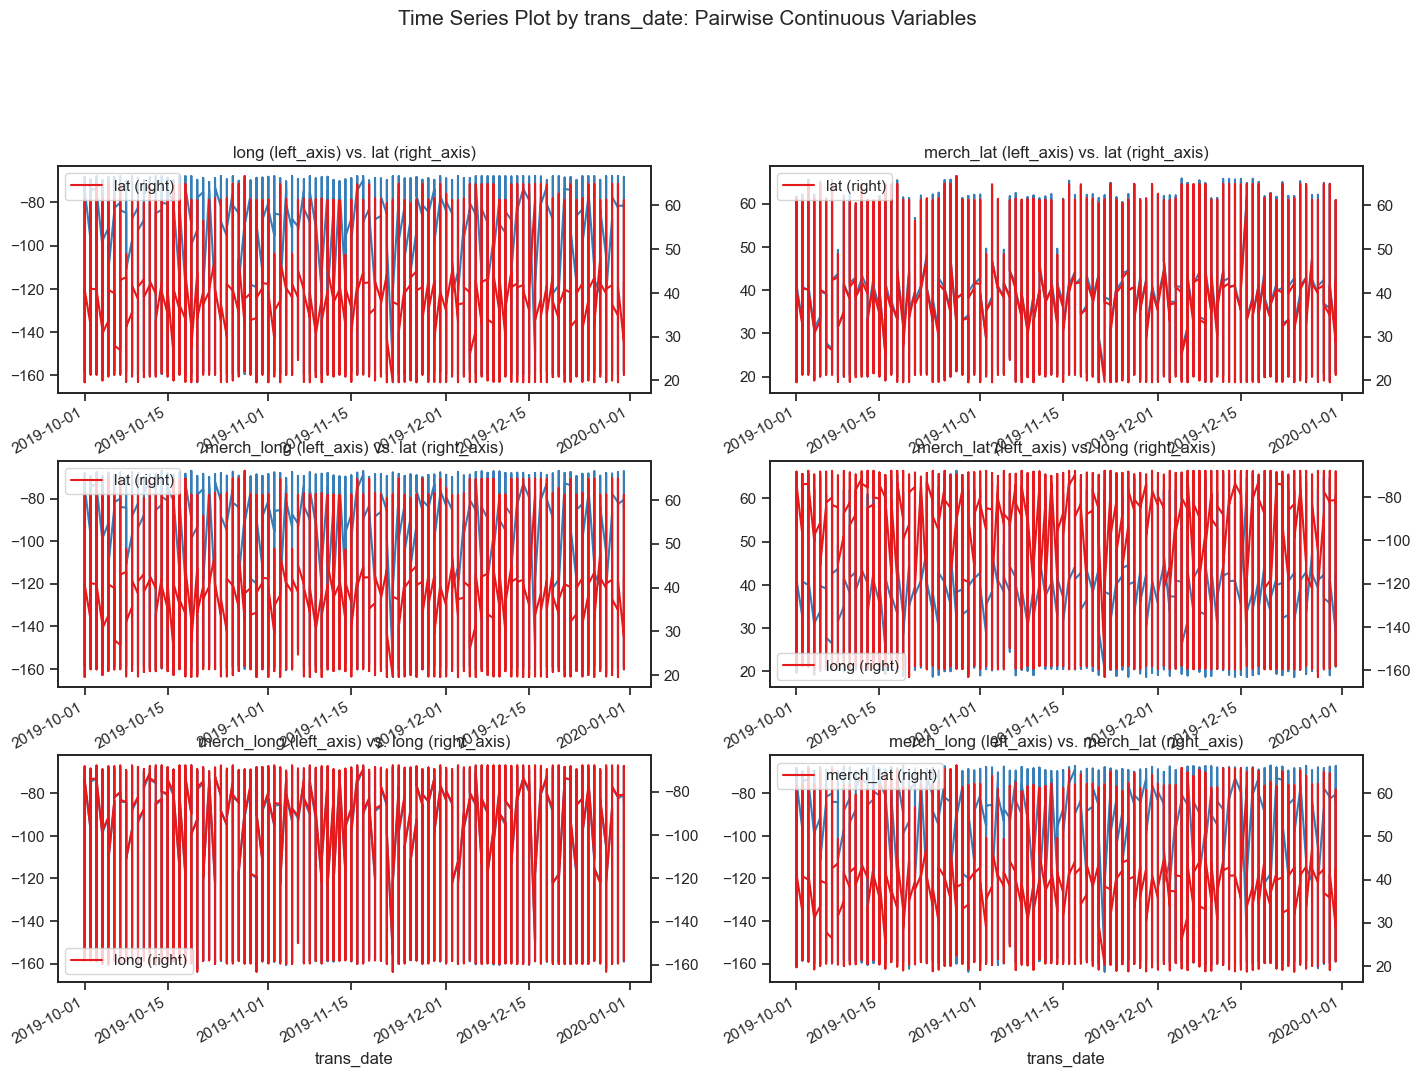

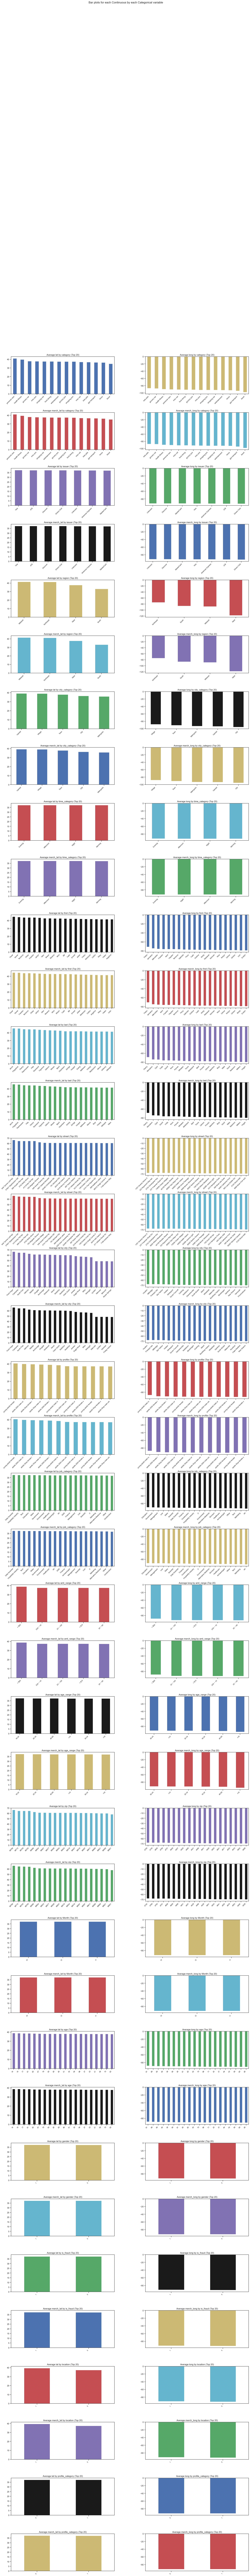

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\assafl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\assafl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\assafl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\assafl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\assafl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\assafl\AppData\Roam

Could not draw wordcloud plot for merchant. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 44 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


first       last     gender               street               \
462753     Shelby      Glover     0                 6752 David Villages   
63649        Mark     Salazar     1          5659 Teresa Neck Suite 997   
1547169   Raymond      Holmes     1                 67296 Michael Creek   
5155753     Devin      Valdez     1    71944 Christopher Mills Apt. 061   
1849028     Brian        Lowe     1        85571 Turner Shoals Apt. 584   
...           ...         ...     ...                               ...   
3836908    Thomas  Washington     1                    7420 Gary Garden   
1933406    Thomas  Stephenson     1                    93629 Davis View   
3017879  Benjamin    Thompson     1                    58314 Diaz Crest   
3585831     Sandy     Hubbard     0            3250 Brad Roads Apt. 133   
3023243   Richard     Beltran     1                    088 Michael Pine   

             city        zip     lat      long            profile            \
462753            Vail  85641  32.0027 -110.7053  young adults female urban   
63649          Fairfax  22031  38.8604  -77.2649     adults 2550 male urban   
1547169  Lawrenceville  30044  33.9418  -84.0706     adults 50up male urban   
5155753         Olathe  66062  38.8733  -94.7752     adults 2550 male urban   
1849028    Englishtown   7726  40.2825  -74.3424    young adults male urban   
...                ...    ...      ...       ...                        ...   
3836908         Fresno  93727  36.7528 -119.7061     adults 50up male urban   
1933406        Bel Air  21014  39.5394  -76.3564     adults 2550 male urban   
3017879  East Hartford   6118  41.7472  -72.6103    young adults male urban   
3585831         Graham  27253  36.0310  -79.3814   adults 2550 female urban   
3023243     Lewisville  75077  33.0775  -97.0704    young adults male urban   

        trans_date    category    is_fraud              merchant               \
462753  2019-10-12  shopping net      0     fraud Kihn  Abernathy and Douglas   
63649   2019-10-14      misc pos      0                 fraud Hermann-Gaylord   
1547169 2019-10-13  shopping net      0               fraud Fisher-Schowalter   
5155753 2019-12-21  shopping pos      0                      fraud Conroy Ltd   
1849028 2019-12-06  shopping pos      0                    fraud Kris-Padberg   
...            ...           ...       ...                                ...   
3836908 2019-11-09  shopping pos      0                  fraud Jast-McDermott   
1933406 2019-11-03  shopping net      0                      fraud Mohr-Bayer   
3017879 2019-12-07  shopping pos      0                      fraud Sawayn PLC   
3585831 2019-12-27  shopping pos      0                     fraud Beier-Hyatt   
3023243 2019-10-08  shopping net      0                    fraud Kassulke PLC   

         merch_lat  merch_long  year  Month    issuer      region    \
462753   31.314803 -111.077369  2019   10            JCB       West   
63649    38.303758  -76.749571  2019   10    Diners Club      South   
1547169  34.473382  -84.759422  2019   10        Unknown      South   
5155753  38.802892  -94.879966  2019   12        Unknown    Midwest   
1849028  41.034431  -74.030527  2019   12           Visa  Northeast   
...            ...         ...   ...    ...          ...        ...   
3836908  35.822744 -120.077360  2019   11            JCB       West   
1933406  39.820215  -76.482681  2019   11       Discover      South   
3017879  41.834333  -72.732701  2019   12           Visa  Northeast   
3585831  35.565824  -78.630339  2019   12       Discover      South   
3023243  32.095954  -97.612892  2019   10           Visa      South   

        job_category  location  profile_category amt_range  age age_range  \
462753   Government       0             0         $10-$100  25     25-34    
63649            IT       0             0         $10-$100  35     35-44    
1547169          IT       0             1         $10-$100  63     45-69    
5155753  Healthcare       

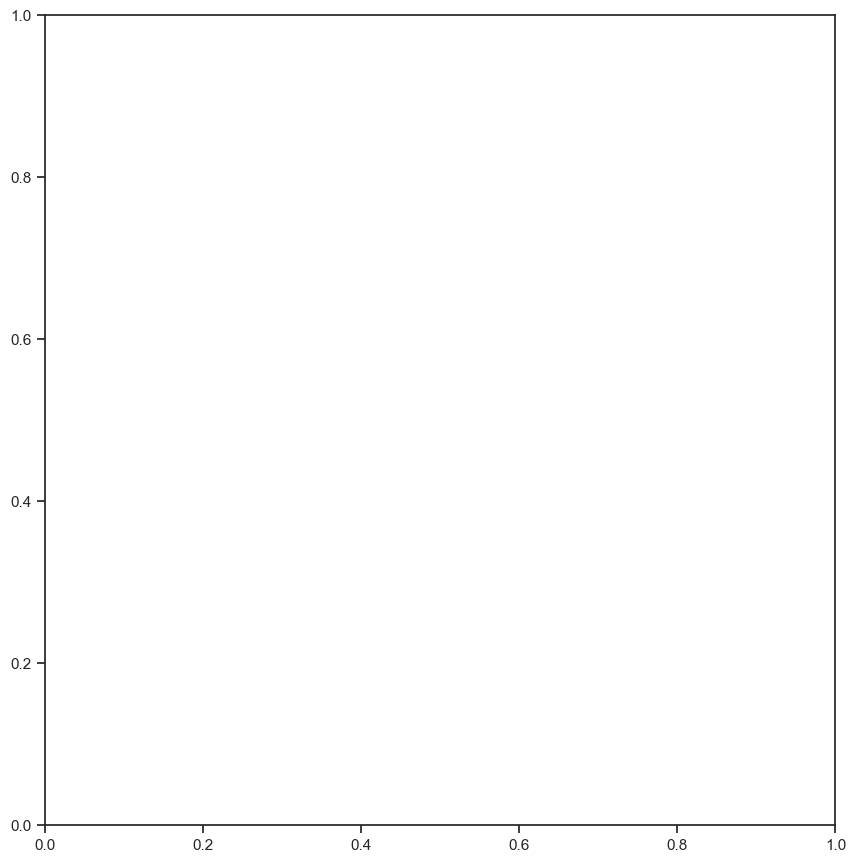

In [5]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(df)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

# Target Value

Categorial 2 classes

<Axes: xlabel='is_fraud', ylabel='count'>

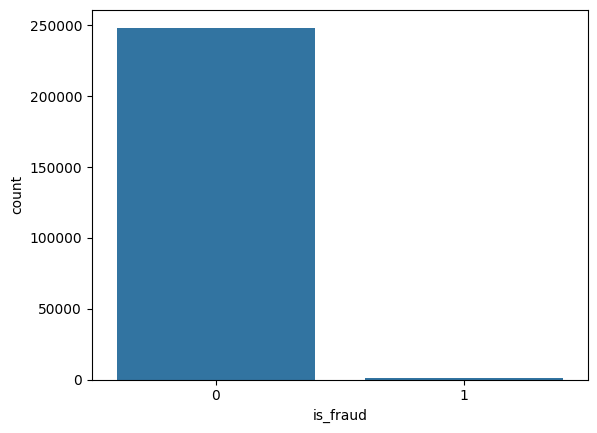

In [134]:
sb.countplot(x='is_fraud', data=df)

In [135]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# Display result
print(age_group_aggregation)

   age_range  is_fraud  count
0        <18         0   1424
1        <18         1      0
2      18-24         0  16629
3      18-24         1    128
4      25-34         0  53925
5      25-34         1    302
6      35-44         0  55635
7      35-44         1    193
8      45-69         0  89491
9      45-69         1    481
10       >70         0  31287
11       >70         1    287


In [136]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# Calculate the total count per age_range
total_counts = age_group_aggregation.groupby('age_range')['count'].transform('sum')

# Calculate the percentage of fraud cases (is_fraud == 1)
age_group_aggregation['fraud_percentage'] = ((age_group_aggregation['count'] / total_counts) * 100)

# Filter only fraud cases (is_fraud == 1) for displaying fraud percentage
fraud_percentage_df = age_group_aggregation[age_group_aggregation['is_fraud'] == 1][['age_range', 'fraud_percentage']]

# Display result
print(fraud_percentage_df)

   age_range  fraud_percentage
1        <18          0.000000
3      18-24          0.763860
5      25-34          0.556918
7      35-44          0.345705
9      45-69          0.534611
11       >70          0.908976


In [284]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['category', 'is_fraud']).size().reset_index(name='count')

# Display result
print(age_group_aggregation)

          category  is_fraud   count
0    entertainment         0       0
1    entertainment         1      52
2      food dining         0       0
3      food dining         1      36
4    gas transport         0       0
5    gas transport         1     103
6      grocery net         0       0
7      grocery net         1      22
8      grocery pos         0       0
9      grocery pos         1     315
10  health fitness         0       0
11  health fitness         1      25
12            home         0       0
13            home         1      37
14       kids pets         0       0
15       kids pets         1      52
16        misc net         0       0
17        misc net         1     182
18        misc pos         0     485
19        misc pos         1      53
20   personal care         0       0
21   personal care         1      29
22    shopping net         0  129014
23    shopping net         1     296
24    shopping pos         0  118892
25    shopping pos         1     175
2

In [285]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['category', 'is_fraud']).size().reset_index(name='count')

# Calculate the total count per age_range
total_counts = age_group_aggregation.groupby('category')['count'].transform('sum')

# Calculate the percentage of fraud cases (is_fraud == 1)
age_group_aggregation['fraud_percentage'] = ((age_group_aggregation['count'] / total_counts) * 100)

# Filter only fraud cases (is_fraud == 1) for displaying fraud percentage
fraud_percentage_df = age_group_aggregation[age_group_aggregation['is_fraud'] == 1][['category', 'fraud_percentage']]

# Display result
print(fraud_percentage_df)

          category  fraud_percentage
1    entertainment        100.000000
3      food dining        100.000000
5    gas transport        100.000000
7      grocery net        100.000000
9      grocery pos        100.000000
11  health fitness        100.000000
13            home        100.000000
15       kids pets        100.000000
17        misc net        100.000000
19        misc pos          9.851301
21   personal care        100.000000
23    shopping net          0.228907
25    shopping pos          0.146976
27          travel        100.000000


In [137]:
df_category.head()

gender state                     profile  \
185      f    nj  young adults female urban    
186      f    nj  young adults female urban    
187      f    nj  young adults female urban    
188      f    nj  young adults female urban    
189      f    nj  young adults female urban    

                            trans_num      category  is_weekend  \
185  d551518dc69441dae803bb711b97c9ee  shopping net        True   
186  ec83997c27461bf8a1a989021e4df9fe  shopping net        True   
187  acdb36bf499af78ea13b2e8772da0d0c  shopping net        True   
188  0e5ec24d278b397d21675e46042778c6  shopping net        True   
189  c9d221acd26a21dfce4b7f79fe0dfcc2  shopping net        True   

     is_suspicious issuer job_category  age_category location  \
185          False   Visa    Scientist  young adults    urban   
186          False   Visa    Scientist  young adults    urban   
187          False   Visa    Scientist  young adults    urban   
188          False   Visa    Scientist  young adults    urban   
189          False   Visa    Scientist  young adults    urban   

    profile_category amt_range(USD) age_range city_category time_category  
185             2550         10-100     18-24          Town       Evening  
186             2550         10-100     18-24          Town       Evening  
187             2550            <10     18-24          Town     Afternoon  
188             2550            <10     18-24          Town       Evening  
189             2550            <10     18-24          Town     Afternoon

# dummies

In [238]:
columns_to_convert = [ 'is_fraud', 'gender', 'is_weekend', 'is_suspicious', 'age_category', 'location', 'profile_category']
df_dummy = df[columns_to_convert]  # Correct way to select multiple columns

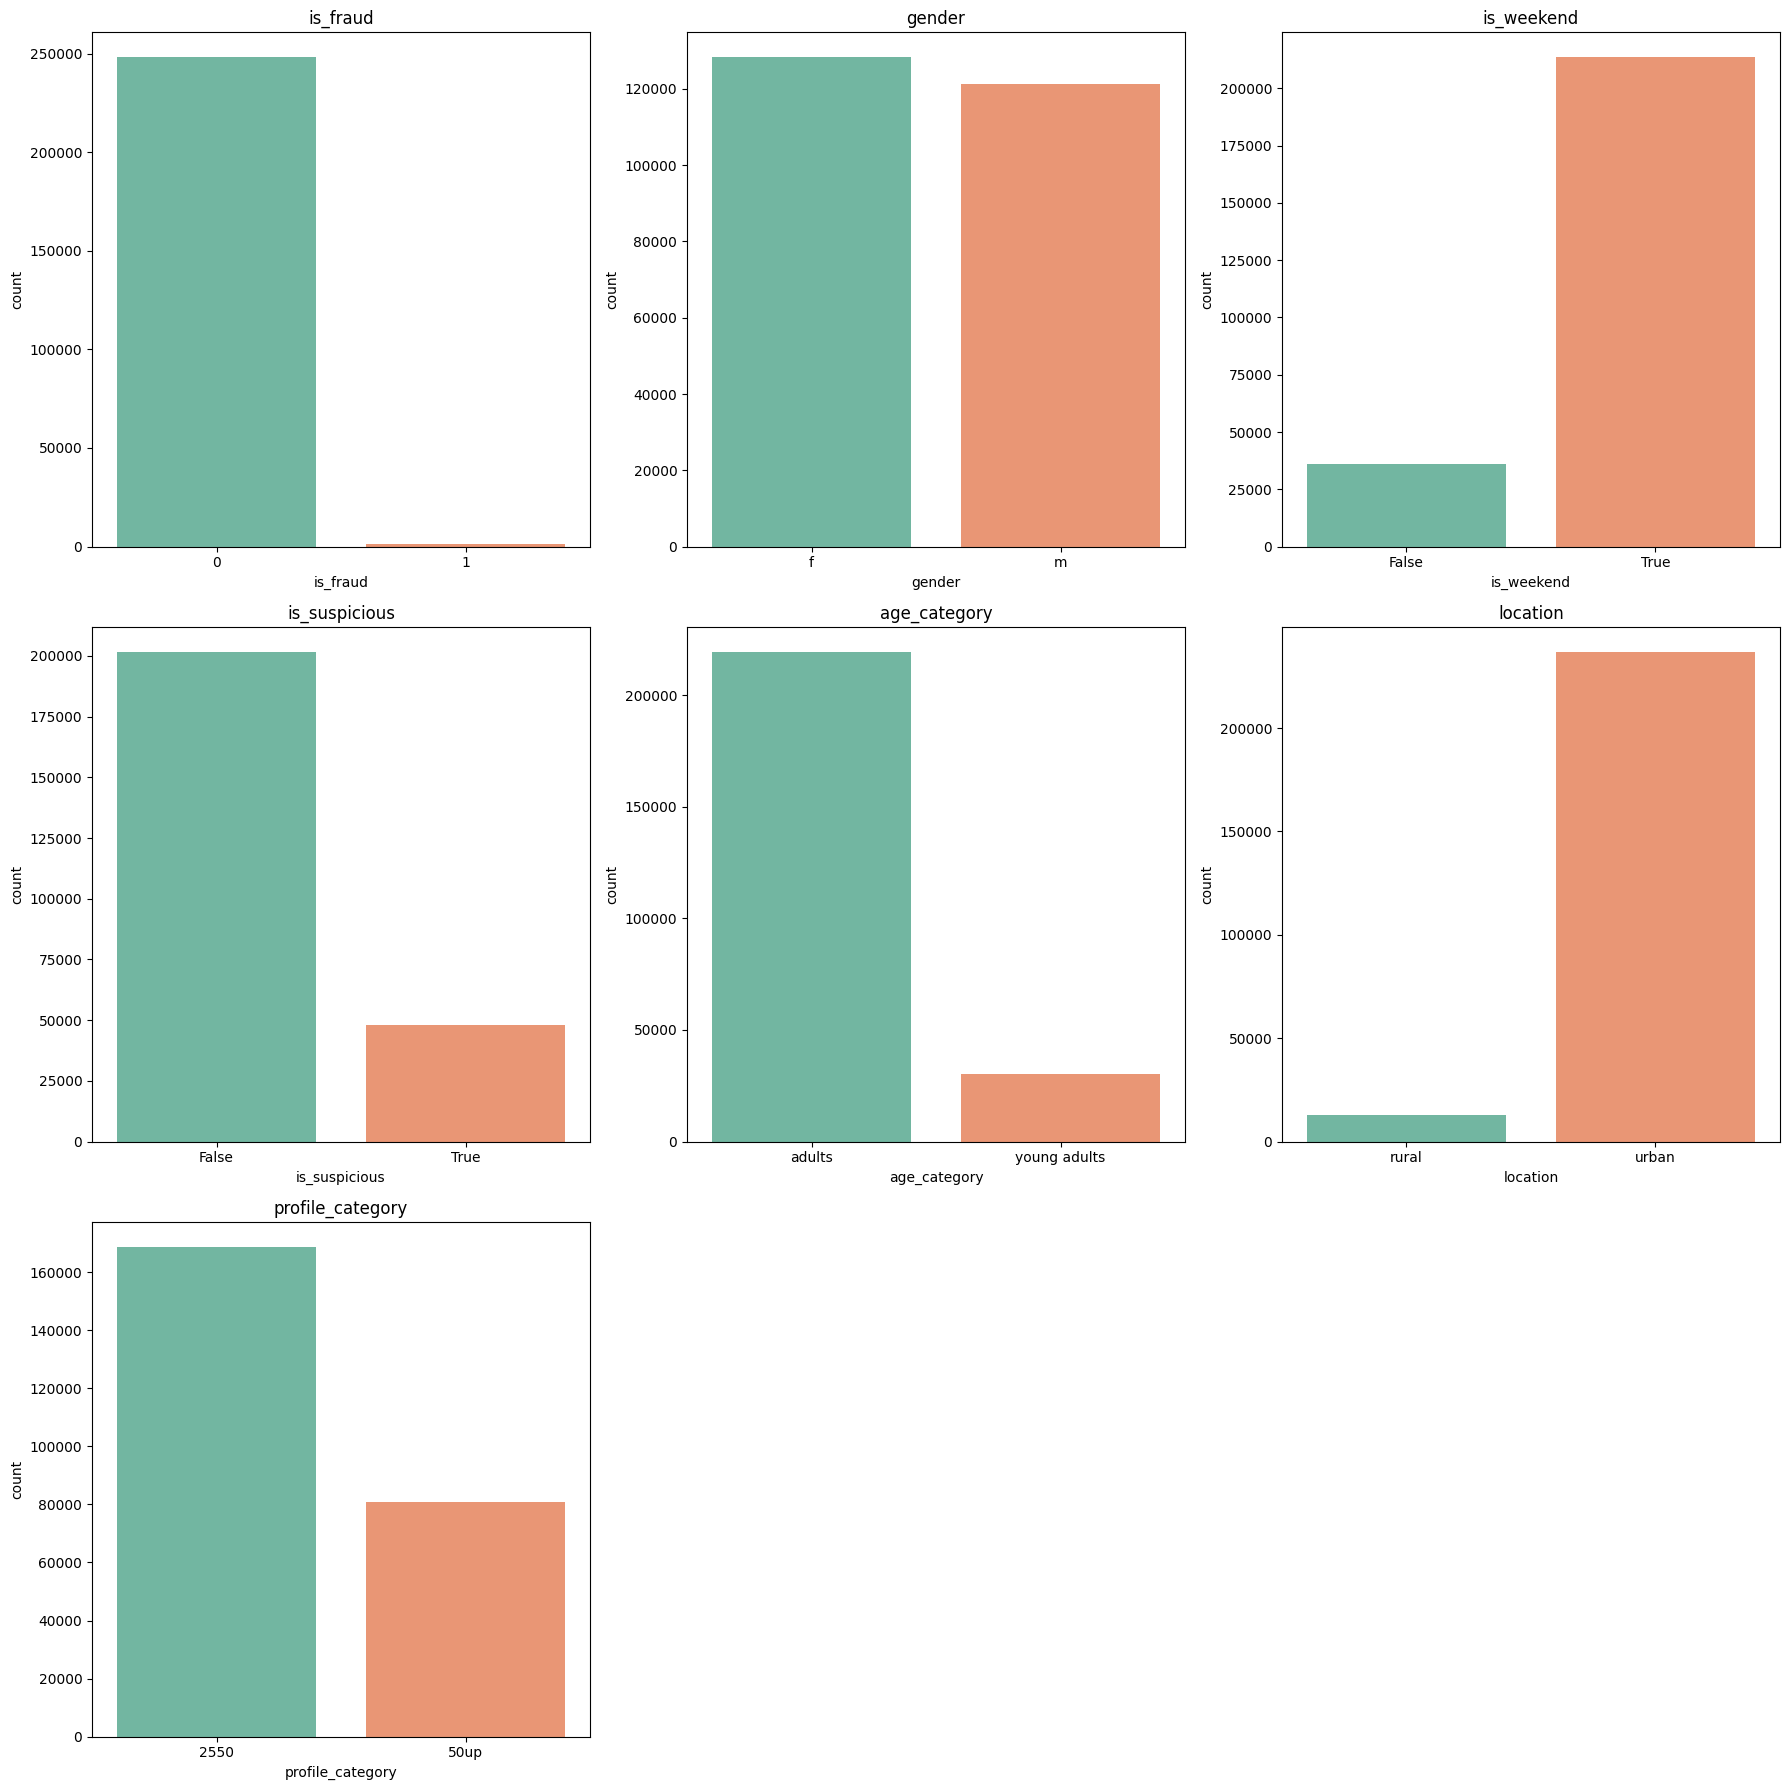

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of subplots
num_cols = len(df_dummy.columns)  
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange plots in rows of 3

plt.figure(figsize=(18, 6 * num_rows))  # Adjust figure size

for i, col in enumerate(df_dummy.columns, 1):  # Start index from 1 for subplot
    plt.subplot(num_rows, 3, i)  # Dynamic row and column adjustment
    sns.countplot(data=df_dummy, x=col, palette='Set2')
    plt.title(f'{col}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Categorial Data

In [227]:
df_category = df_category.drop(['gender', 'is_weekend', 'is_suspicious', 'age_category', 'location', 'profile_category'], axis=1)

In [228]:
df_category = df_category.drop(['trans_num'], axis=1)

In [229]:
df_category

state                     profile      category    issuer  \
185        nj  young adults female urban   shopping net      Visa   
186        nj  young adults female urban   shopping net      Visa   
187        nj  young adults female urban   shopping net      Visa   
188        nj  young adults female urban   shopping net      Visa   
189        nj  young adults female urban   shopping net      Visa   
...       ...                         ...           ...       ...   
1364531    ny     adults 50up male urban   shopping pos  Discover   
1364532    ny     adults 50up male urban   shopping pos  Discover   
1364533    ny     adults 50up male urban   shopping pos  Discover   
1364534    ny     adults 50up male urban   shopping pos  Discover   
1364535    ny     adults 50up male urban   shopping pos  Discover   

        job_category amt_range(USD) age_range city_category time_category  
185        Scientist         10-100     18-24          Town       Evening  
186        Scientist         10-100     18-24          Town       Evening  
187        Scientist            <10     18-24          Town     Afternoon  
188        Scientist            <10     18-24          Town       Evening  
189        Scientist            <10     18-24          Town     Afternoon  
...              ...            ...       ...           ...           ...  
1364531           IT       100-1000     45-69          Town       Morning  
1364532           IT         10-100     45-69          Town         Night  
1364533           IT       100-1000     45-69          Town         Night  
1364534           IT         10-100     45-69          Town       Morning  
1364535           IT         10-100     45-69          Town         Night  

[249782 rows x 9 columns]

In [239]:
# plot_categorical = lambda col: sns.countplot(x=col, data=df_categorical)

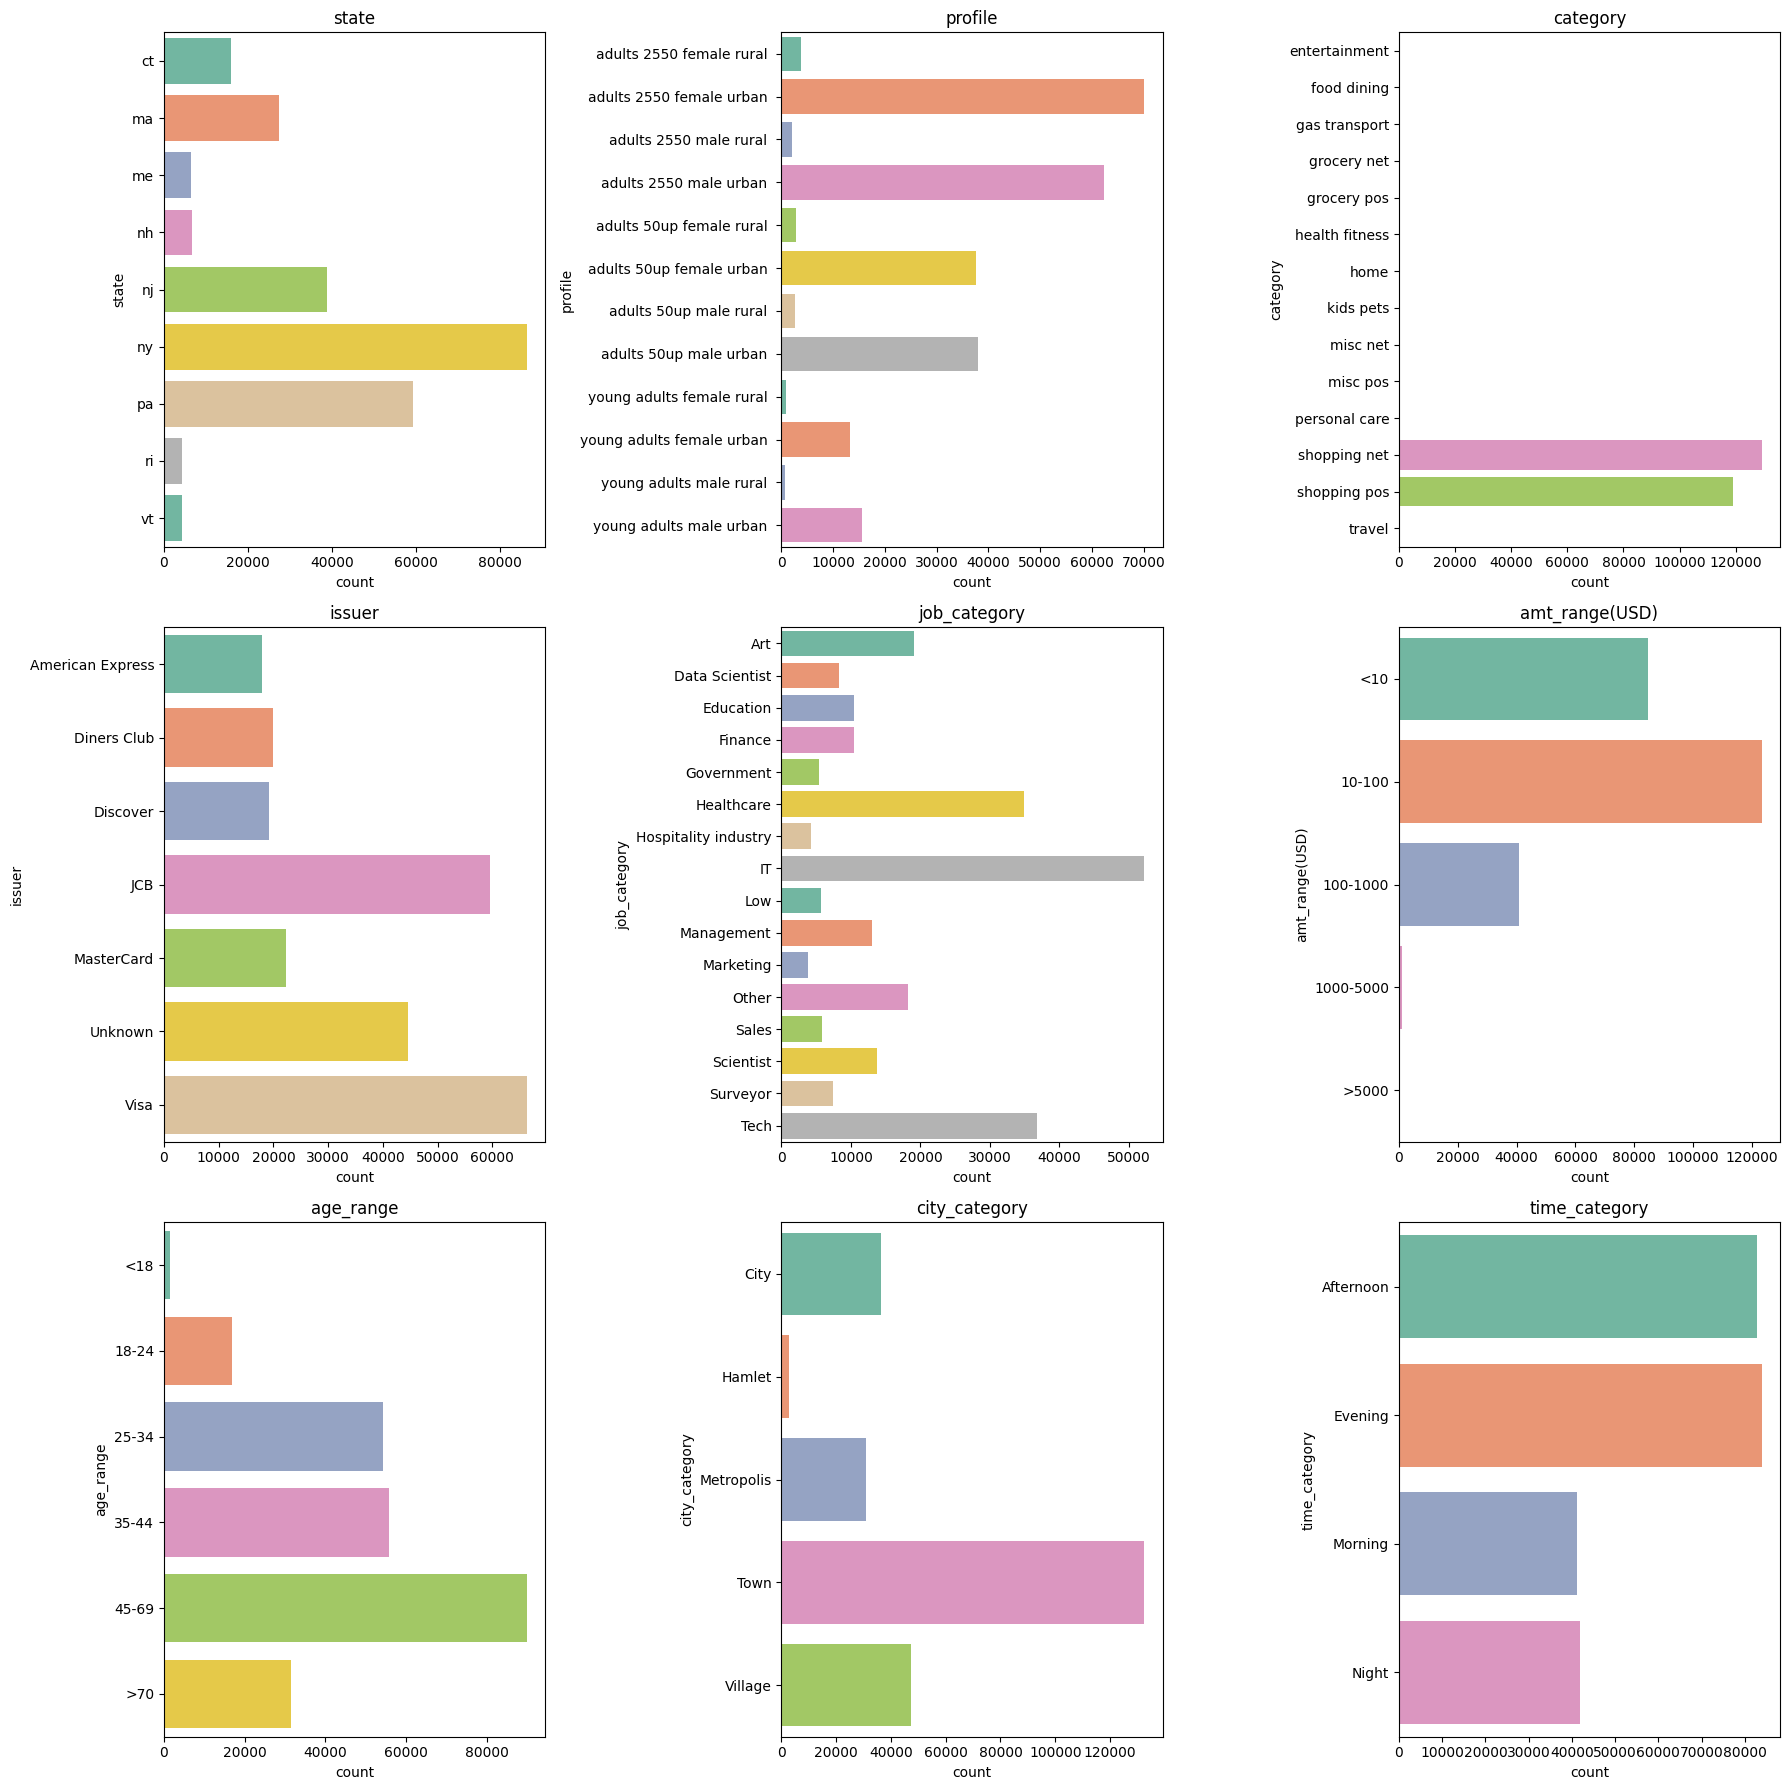

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of subplots
num_cols = len(df_category.columns)  
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange plots in rows of 3

plt.figure(figsize=(18, 6 * num_rows) ) # Adjust figure size

for i, col in enumerate(df_category.columns, 1):  # Start index from 1 for subplot
    plt.subplot(num_rows, 3, i)  # Dynamic row and column adjustment
    sns.countplot(data=df_category, y=col, palette='Set2')
    plt.title(f'{col}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Histograms for continues numbers

In [240]:
df_num = df_num.drop(['is_fraud'], axis=1)

In [241]:
# df_num=df._get_numeric_data().dropna()
df_num.shape

(249782, 8)

In [242]:
df_num

zip      lat     long      acct_num  merch_lat  merch_long  day  \
185       7005  40.9115 -74.4140  826475243361  41.497516  -74.258973    9   
186       7005  40.9115 -74.4140  826475243361  40.661566  -73.849180   11   
187       7005  40.9115 -74.4140  826475243361  41.655939  -75.234739   23   
188       7005  40.9115 -74.4140  826475243361  40.062355  -74.923742   24   
189       7005  40.9115 -74.4140  826475243361  41.285106  -74.645948    8   
...        ...      ...      ...           ...        ...         ...  ...   
1364531  12414  42.2276 -73.8985  846920444376  41.833756  -74.700726   27   
1364532  12414  42.2276 -73.8985  846920444376  41.820045  -74.555250    2   
1364533  12414  42.2276 -73.8985  846920444376  42.991588  -73.760047   30   
1364534  12414  42.2276 -73.8985  846920444376  42.047309  -73.327625   27   
1364535  12414  42.2276 -73.8985  846920444376  42.359574  -74.229708   10   

         age  
185       22  
186       22  
187       22  
188       22  
189       22  
...      ...  
1364531   57  
1364532   57  
1364533   57  
1364534   57  
1364535   57  

[249782 rows x 8 columns]

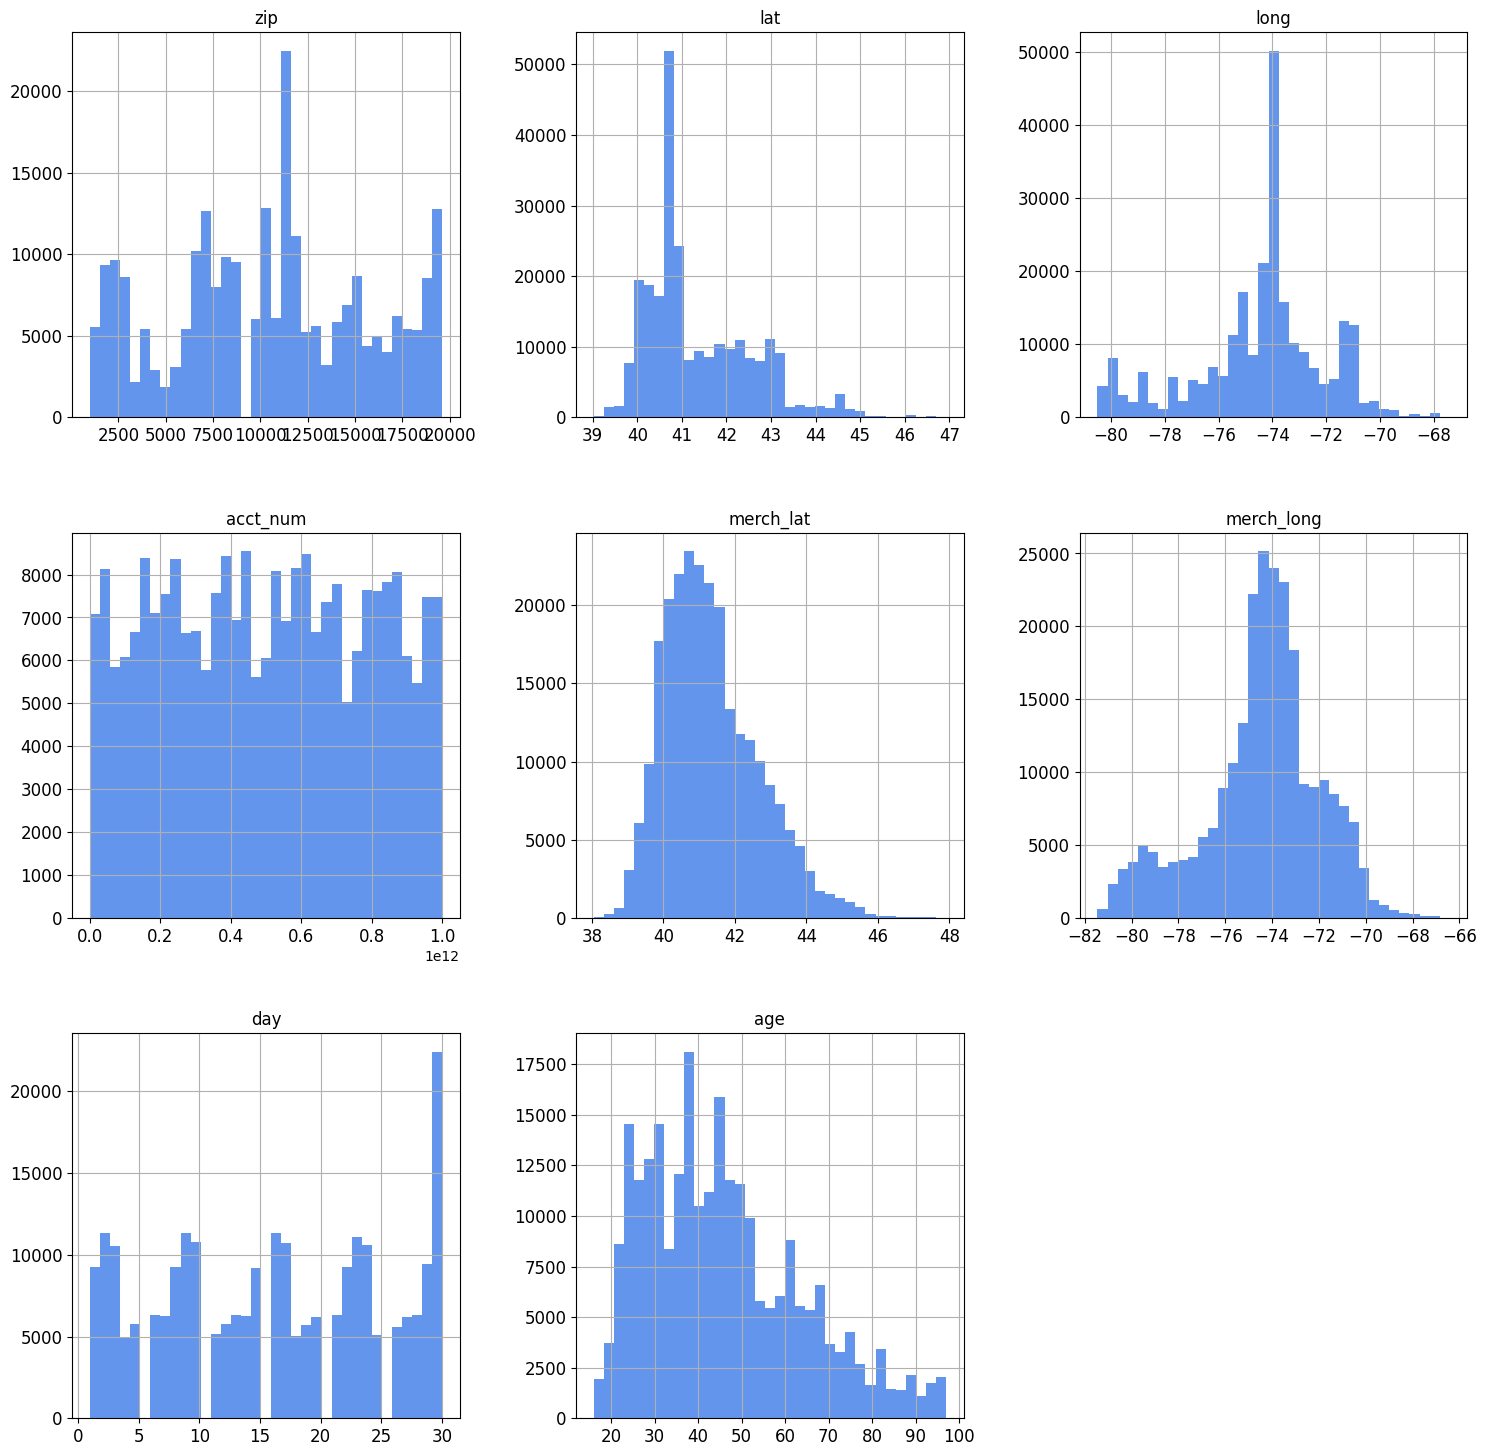

In [243]:
df_num.hist(figsize=(18, 18), bins=35, xlabelsize=12, ylabelsize=12, color = "cornflowerblue");

# Skewness

In [244]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

# Y - Target Value

<Axes: xlabel='is_fraud', ylabel='count'>

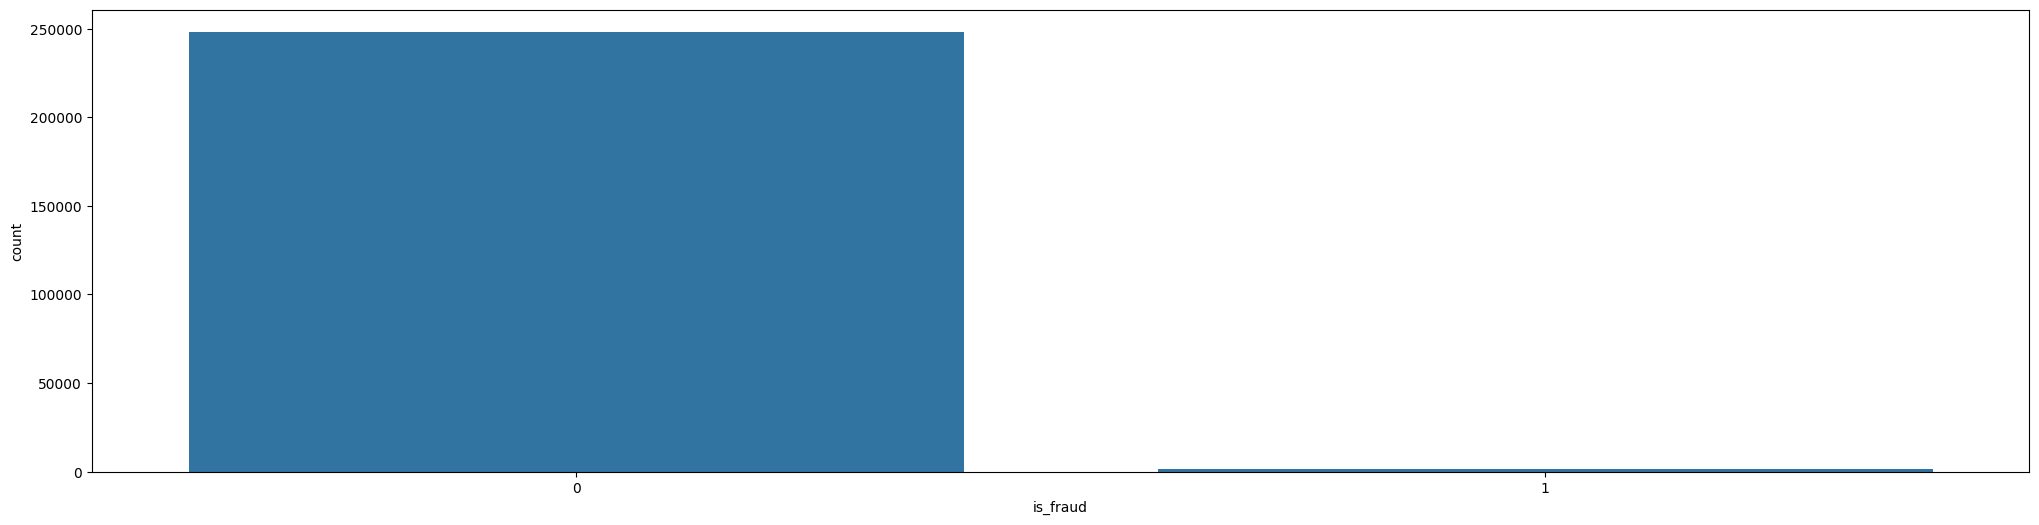

In [150]:
fig, ax=plt.subplots(figsize=(25, 6))
sns.countplot(x=df['is_fraud'].dropna(),data=df)

In [144]:
df['is_fraud'].value_counts()

is_fraud
0    1283721
1       8091
Name: count, dtype: int64

# Label Encoding

In [152]:
from sklearn.preprocessing import LabelEncoder

# Identify object (categorical) columns
categorical_cols = df_protocol.select_dtypes(include=['object', 'category']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_protocol[col] = le.fit_transform(df_protocol[col])

In [156]:
df_protocol = df_protocol.drop(['first', 'last', 'street', 'city'], axis=1)

In [159]:
df_protocol = df_protocol.drop(['merchant'], axis=1)

In [190]:
df_protocol = df_protocol.drop(['year', 'month', 'quarter'], axis=1)

In [203]:
df_protocol = df_protocol.drop(['zip', 'trans_date', 'trans_num', 'acct_num'], axis=1)

In [205]:
df_protocol = df_protocol.drop(['profile', 'day'], axis=1)

In [206]:
df_protocol

gender  state      lat     long  category  is_fraud  merch_lat  \
185           0      4  40.9115 -74.4140        11         0  41.497516   
186           0      4  40.9115 -74.4140        11         0  40.661566   
187           0      4  40.9115 -74.4140        11         0  41.655939   
188           0      4  40.9115 -74.4140        11         0  40.062355   
189           0      4  40.9115 -74.4140        11         0  41.285106   
...         ...    ...      ...      ...       ...       ...        ...   
1364531       1      5  42.2276 -73.8985        12         0  41.833756   
1364532       1      5  42.2276 -73.8985        12         0  41.820045   
1364533       1      5  42.2276 -73.8985        12         0  42.991588   
1364534       1      5  42.2276 -73.8985        12         0  42.047309   
1364535       1      5  42.2276 -73.8985        12         0  42.359574   

         merch_long  is_weekend  is_suspicious  issuer  job_category  \
185      -74.258973        True          False       6            13   
186      -73.849180        True          False       6            13   
187      -75.234739        True          False       6            13   
188      -74.923742        True          False       6            13   
189      -74.645948        True          False       6            13   
...             ...         ...            ...     ...           ...   
1364531  -74.700726        True           True       2             7   
1364532  -74.555250       False          False       2             7   
1364533  -73.760047        True          False       2             7   
1364534  -73.327625        True           True       2             7   
1364535  -74.229708        True          False       2             7   

         age_category  location  profile_category  amt_range(USD)  age  \
185                 1         1                 0               0   22   
186                 1         1                 0               0   22   
187                 1         1                 0               3   22   
188                 1         1                 0               3   22   
189                 1         1                 0               3   22   
...               ...       ...               ...             ...  ...   
1364531             0         1                 1               1   57   
1364532             0         1                 1               0   57   
1364533             0         1                 1               1   57   
1364534             0         1                 1               0   57   
1364535             0         1                 1               0   57   

         age_range  city_category  time_category  
185              0              3              1  
186              0              3              1  
187              0              3              0  
188              0              3              1  
189              0              3              0  
...            ...            ...            ...  
1364531          3              3              2  
1364532          3              3              3  
1364533          3              3              3  
1364534          3              3              2  
1364535          3              3              3  

[249782 rows x 20 columns]

In [211]:
df = df.drop(['first', 'last', 'street', 'city', 'merchant', 'zip', 'trans_date', 'trans_num', 'acct_num',  'profile', 'day'], axis=1)

In [213]:
df

gender state      lat     long      category  is_fraud  merch_lat  \
185          f    nj  40.9115 -74.4140  shopping net         0  41.497516   
186          f    nj  40.9115 -74.4140  shopping net         0  40.661566   
187          f    nj  40.9115 -74.4140  shopping net         0  41.655939   
188          f    nj  40.9115 -74.4140  shopping net         0  40.062355   
189          f    nj  40.9115 -74.4140  shopping net         0  41.285106   
...        ...   ...      ...      ...           ...       ...        ...   
1364531      m    ny  42.2276 -73.8985  shopping pos         0  41.833756   
1364532      m    ny  42.2276 -73.8985  shopping pos         0  41.820045   
1364533      m    ny  42.2276 -73.8985  shopping pos         0  42.991588   
1364534      m    ny  42.2276 -73.8985  shopping pos         0  42.047309   
1364535      m    ny  42.2276 -73.8985  shopping pos         0  42.359574   

         merch_long  is_weekend  is_suspicious    issuer job_category  \
185      -74.258973        True          False      Visa    Scientist   
186      -73.849180        True          False      Visa    Scientist   
187      -75.234739        True          False      Visa    Scientist   
188      -74.923742        True          False      Visa    Scientist   
189      -74.645948        True          False      Visa    Scientist   
...             ...         ...            ...       ...          ...   
1364531  -74.700726        True           True  Discover           IT   
1364532  -74.555250       False          False  Discover           IT   
1364533  -73.760047        True          False  Discover           IT   
1364534  -73.327625        True           True  Discover           IT   
1364535  -74.229708        True          False  Discover           IT   

         age_category location profile_category amt_range(USD)  age age_range  \
185      young adults    urban             2550         10-100   22     18-24   
186      young adults    urban             2550         10-100   22     18-24   
187      young adults    urban             2550            <10   22     18-24   
188      young adults    urban             2550            <10   22     18-24   
189      young adults    urban             2550            <10   22     18-24   
...               ...      ...              ...            ...  ...       ...   
1364531        adults    urban             50up       100-1000   57     45-69   
1364532        adults    urban             50up         10-100   57     45-69   
1364533        adults    urban             50up       100-1000   57     45-69   
1364534        adults    urban             50up         10-100   57     45-69   
1364535        adults    urban             50up         10-100   57     45-69   

        city_category time_category  
185              Town       Evening  
186              Town       Evening  
187              Town     Afternoon  
188              Town       Evening  
189              Town     Afternoon  
...               ...           ...  
1364531          Town       Morning  
1364532          Town         Night  
1364533          Town         Night  
1364534          Town       Morning  
1364535          Town         Night  

[249782 rows x 20 columns]

In [224]:
with open('df_fruad.pkl', 'wb') as f:
    pickle.dump(df, f)

print("df_fruad saved as a pickle file.")

df_fruad saved as a pickle file.


# Correlation

In [207]:
df_protocol.corr(method='spearman')

gender     state       lat      long  category  is_fraud  \
gender            1.000000 -0.025117 -0.014721  0.001945 -0.287602  0.003995   
state            -0.025117  1.000000 -0.355262 -0.632696  0.009483  0.010317   
lat              -0.014721 -0.355262  1.000000  0.461892 -0.045152  0.009240   
long              0.001945 -0.632696  0.461892  1.000000 -0.024951 -0.006459   
category         -0.287602  0.009483 -0.045152 -0.024951  1.000000 -0.100557   
is_fraud          0.003995  0.010317  0.009240 -0.006459 -0.100557  1.000000   
merch_lat        -0.006831 -0.293539  0.849054  0.378680 -0.049312  0.006429   
merch_long        0.008216 -0.622861  0.420265  0.943709 -0.026293 -0.006169   
is_weekend        0.001530  0.000375  0.001874 -0.000634  0.140040  0.009910   
is_suspicious     0.027736  0.021703 -0.013861 -0.032409  0.443670 -0.028210   
issuer           -0.041615 -0.057188  0.007551  0.027355  0.021571 -0.017526   
job_category      0.025057 -0.004767 -0.017361  0.000932 -0.048505 -0.005741   
age_category      0.035503 -0.008160  0.020507  0.005044 -0.357480  0.000260   
location          0.029912 -0.119472 -0.135092  0.058678  0.152294  0.000952   
profile_category  0.021856  0.023289 -0.026239 -0.042313  0.621298  0.022761   
amt_range(USD)    0.085178 -0.001485  0.001885  0.003469 -0.087623  0.018583   
age              -0.013480  0.023219 -0.017726 -0.043581  0.579315  0.010158   
age_range        -0.020693  0.027328 -0.017975 -0.045496  0.510539  0.007334   
city_category     0.004360 -0.019578  0.152358  0.034884 -0.046209 -0.000935   
time_category     0.032873  0.028281 -0.015321 -0.039356  0.535367  0.040466   

                  merch_lat  merch_long  is_weekend  is_suspicious    issuer  \
gender            -0.006831    0.008216    0.001530       0.027736 -0.041615   
state             -0.293539   -0.622861    0.000375       0.021703 -0.057188   
lat                0.849054    0.420265    0.001874      -0.013861  0.007551   
long               0.378680    0.943709   -0.000634      -0.032409  0.027355   
category          -0.049312   -0.026293    0.140040       0.443670  0.021571   
is_fraud           0.006429   -0.006169    0.009910      -0.028210 -0.017526   
merch_lat          1.000000    0.347802    0.001875      -0.016531  0.003933   
merch_long         0.347802    1.000000    0.000363      -0.030993  0.026547   
is_weekend         0.001875    0.000363    1.000000      -0.000762  0.002304   
is_suspicious     -0.016531   -0.030993   -0.000762       1.000000  0.004258   
issuer             0.003933    0.026547    0.002304       0.004258  1.000000   
job_category      -0.011712    0.000446    0.002781      -0.045727 -0.001786   
age_category       0.025054    0.007258   -0.009746      -0.181504 -0.041217   
location          -0.133355    0.058390   -0.004300      -0.090368 -0.003321   
profile_category  -0.030060   -0.041276   -0.002266       0.676985  0.007039   
amt_range(USD)     0.003534    0.004362    0.000844      -0.010660 -0.006038   
age               -0.024371   -0.043876    0.001758       0.552623  0.019259   
age_range         -0.021726   -0.044901    0.000198       0.483550  0.013246   
city_category      0.141950    0.032661    0.002409       0.004138  0.012809   
time_category     -0.017442   -0.038556   -0.002712       0.504579  0.004404   

                  job_category  age_category  location  profile_category  \
gender                0.025057      0.035503  0.029912          0.021856   
state                -0.004767     -0.008160 -0.119472          0.023289   
lat                  -0.017361      0.020507 -0.135092         -0.026239   
long                  0.000932      0.005044  0.058678         -0.042313   
category             -0.048505     -0.357480  0.152294          0.621298   
is_fraud             -0.005741      0.000260  0.000952          0.022761   
merch_lat            -0.011712      0.025054 -0.133355         -0.030060   
merch_long            0.000446      0.007258  0.05

<Axes: >

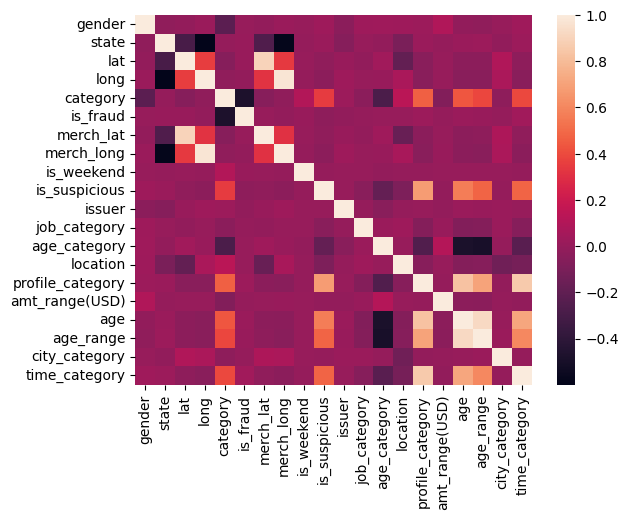

In [208]:
sns.heatmap(df_protocol.corr())

In [245]:
# # Filter the DataFrame to include only float and int columns
# numeric_df = df.select_dtypes(include=['float', 'int'])

# Compute the correlation matrix
numeric_corr_matrix = df_num.corr()

# Display the correlation matrix
print(numeric_corr_matrix)

                 zip       lat      long  acct_num  merch_lat  merch_long  \
zip         1.000000 -0.429390 -0.763570 -0.009686  -0.386518   -0.743125   
lat        -0.429390  1.000000  0.350616  0.021083   0.899434    0.341551   
long       -0.763570  0.350616  1.000000  0.015330   0.315212    0.972743   
acct_num   -0.009686  0.021083  0.015330  1.000000   0.019622    0.015864   
merch_lat  -0.386518  0.899434  0.315212  0.019622   1.000000    0.307115   
merch_long -0.743125  0.341551  0.972743  0.015864   0.307115    1.000000   
day        -0.000918 -0.000301 -0.000304 -0.000493   0.000815   -0.000260   
age         0.030243 -0.035975 -0.043574 -0.012797  -0.033571   -0.042146   

                 day       age  
zip        -0.000918  0.030243  
lat        -0.000301 -0.035975  
long       -0.000304 -0.043574  
acct_num   -0.000493 -0.012797  
merch_lat   0.000815 -0.033571  
merch_long -0.000260 -0.042146  
day         1.000000 -0.004071  
age        -0.004071  1.000000  


<Axes: >

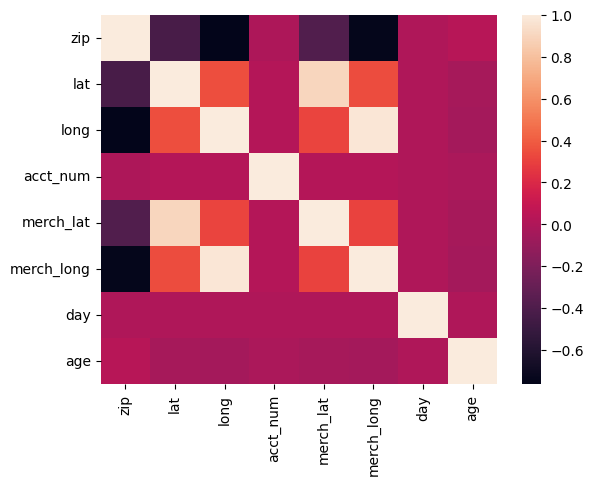

In [246]:
sb.heatmap(numeric_corr_matrix)

# t-test

In [165]:
import scipy.stats as stats
import seaborn as sns

T-statistic: -6.720076075740861
P-value: 1.8201707624624478e-11


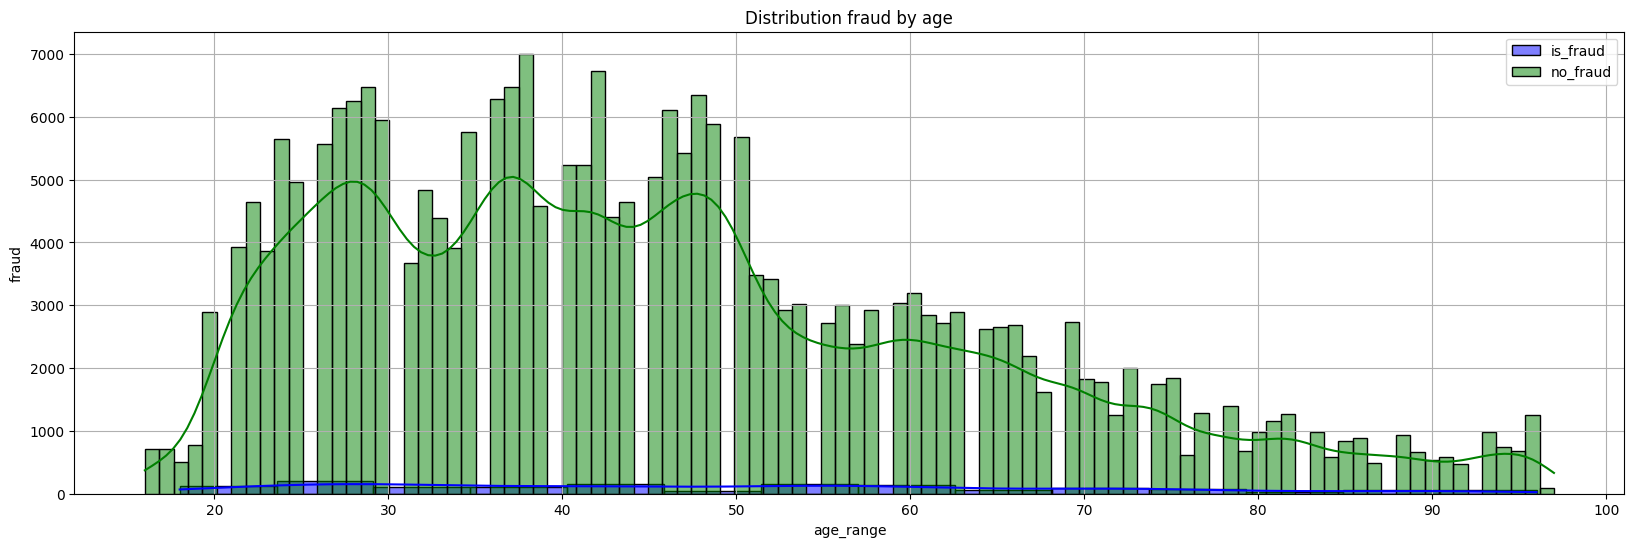

In [168]:
#Separate the consumption data by weekends and weekdays
no_fraud = df[df['is_fraud'] == 0]['age']
is_fraud = df[df['is_fraud'] == 1]['age']
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(no_fraud, is_fraud)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution of water consumption for weekends and weekdays
plt.figure(figsize=(20, 6))
sns.histplot(is_fraud, kde=True, color='blue', label='is_fraud', alpha=0.5)
sns.histplot(no_fraud, kde=True, color='green', label='no_fraud', alpha=0.5)
plt.title('Distribution fraud by age')
plt.xlabel('age_range')
plt.ylabel('fraud')
plt.legend()
plt.grid(True)
plt.show()

# Anova

In [ ]:
# # Set the random seed for reproducibility
# np.random.seed(42)
# group1 = np.random.normal(loc=50, scale=5, size=100)
# group2 = np.random.normal(loc=60, scale=5, size=100)
# group3 = np.random.normal(loc=70, scale=5, size=100)

# # performe ANOVA
# f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# print(f"F-statistic: {f_statistic}")
# print(f"p-value: {p_value}")

# if p_value < 0.05:
#     print("There is a significant difference between the group means")
# else:
#     print("significant difference between the group means")

# CHI-Square

In [ ]:
from scipy.stats import chisquare

In [169]:
# # Aggregate the age groups with fraud count
# age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# # Calculate the total count per age_range
# total_counts = age_group_aggregation.groupby('age_range')['count'].transform('sum')

# # Calculate the percentage of fraud cases (is_fraud == 1)
# age_group_aggregation['fraud_percentage'] = ((age_group_aggregation['count'] / total_counts) * 100)

# # Filter only fraud cases (is_fraud == 1) for displaying fraud percentage
# fraud_percentage_df = age_group_aggregation[age_group_aggregation['is_fraud'] == 1][['age_range', 'fraud_percentage']]

# # Display result
# print(fraud_percentage_df)

   age_range  fraud_percentage
1        <18          0.000000
3      18-24          0.763860
5      25-34          0.556918
7      35-44          0.345705
9      45-69          0.534611
11       >70          0.908976


# Data Cleansing

# Missing Data

In [171]:
df.isnull().head()

first   last  gender  street   city  state    zip    lat   long  \
185  False  False   False   False  False  False  False  False  False   
186  False  False   False   False  False  False  False  False  False   
187  False  False   False   False  False  False  False  False  False   
188  False  False   False   False  False  False  False  False  False   
189  False  False   False   False  False  False  False  False  False   

     acct_num  ...  issuer  job_category  age_category  location  \
185     False  ...   False         False         False     False   
186     False  ...   False         False         False     False   
187     False  ...   False         False         False     False   
188     False  ...   False         False         False     False   
189     False  ...   False         False         False     False   

     profile_category  amt_range(USD)    age  age_range  city_category  \
185             False           False  False      False          False   
186             False           False  False      False          False   
187             False           False  False      False          False   
188             False           False  False      False          False   
189             False           False  False      False          False   

     time_category  
185          False  
186          False  
187          False  
188          False  
189          False  

[5 rows x 34 columns]

<Axes: >

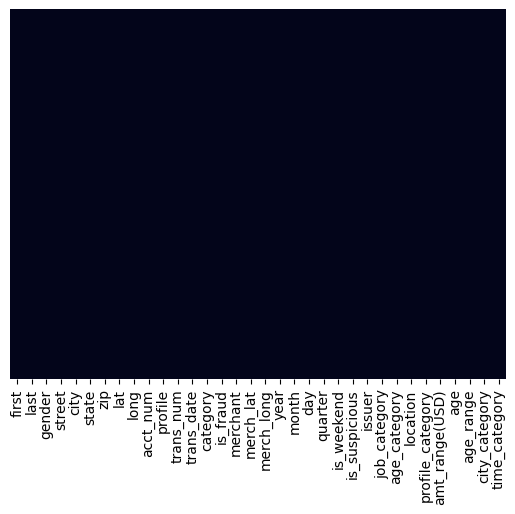

In [172]:
sb.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [251]:
# pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org missingno

<Axes: >

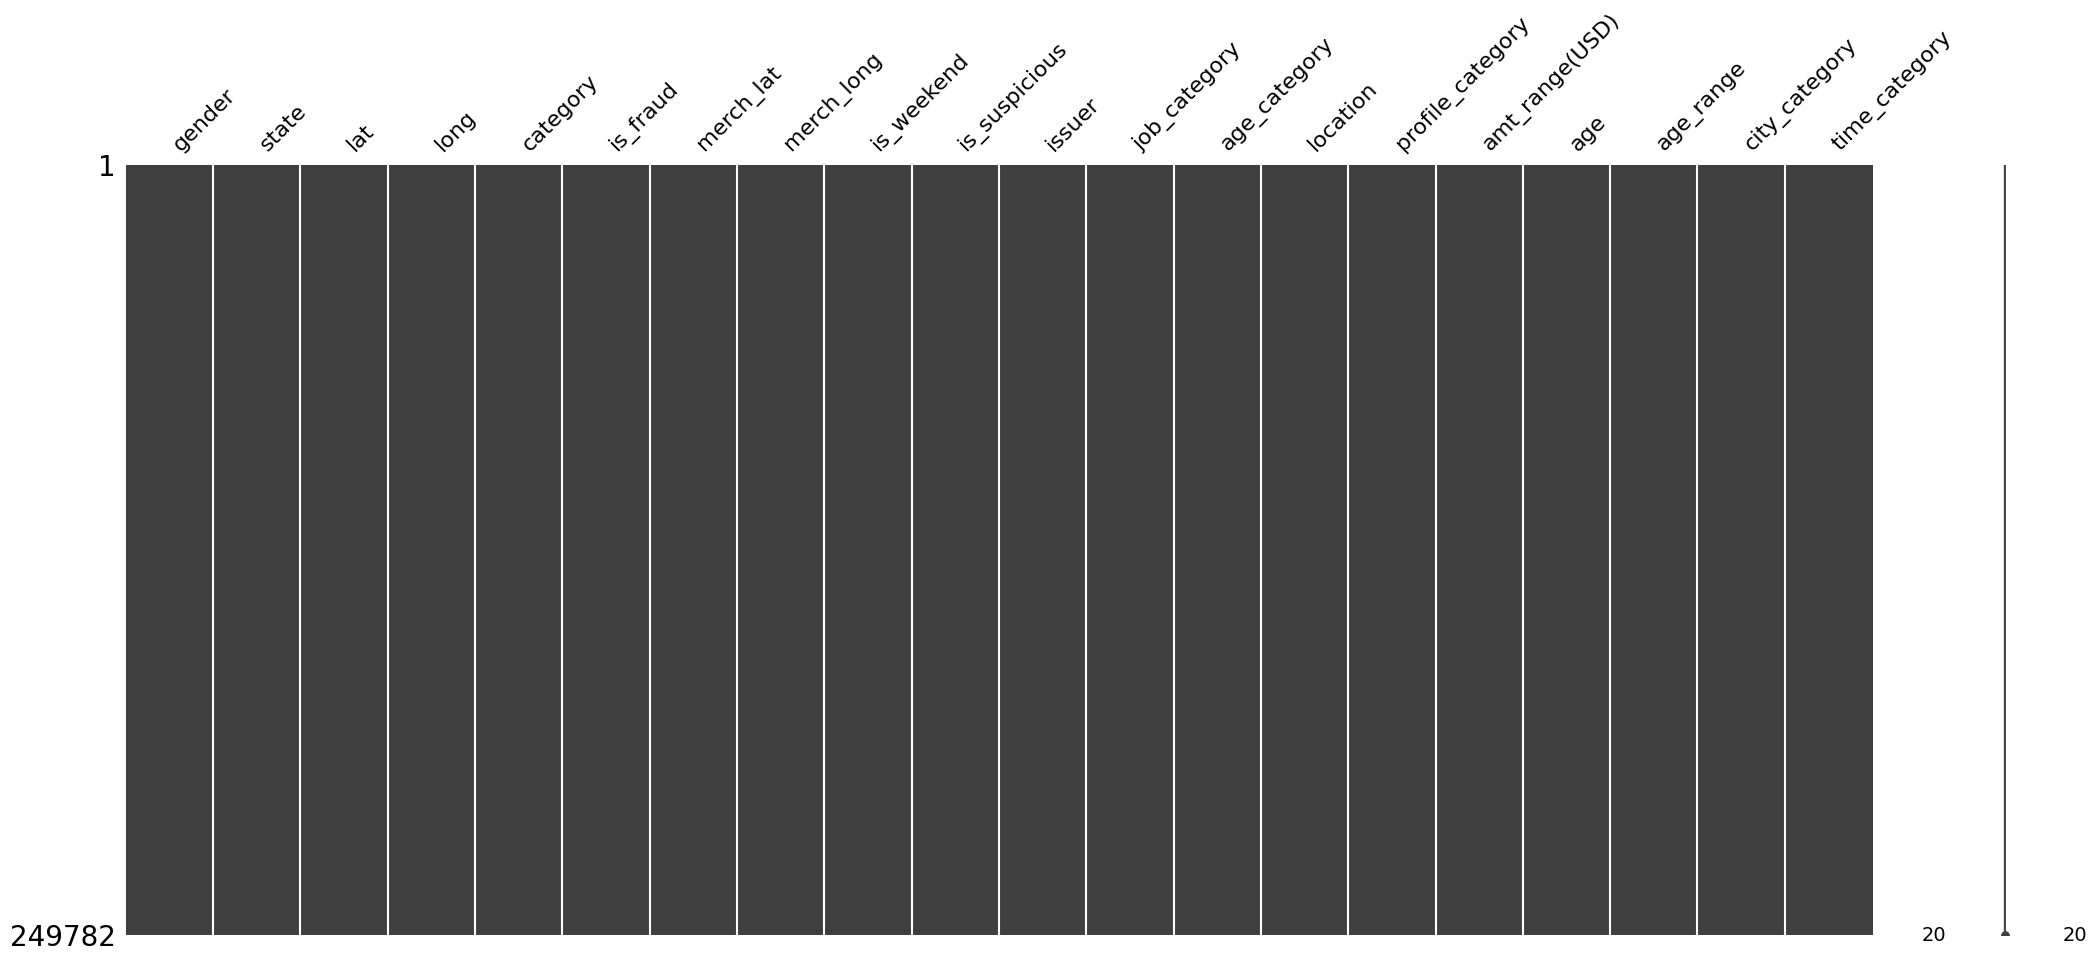

In [250]:
#missing value matrix by missingno libarary
!pip install missingno
import missingno as msno
msno.matrix(df)

# Outliers

In [188]:
df_num = df_num.drop(['year', 'month', 'quarter'], axis=1)

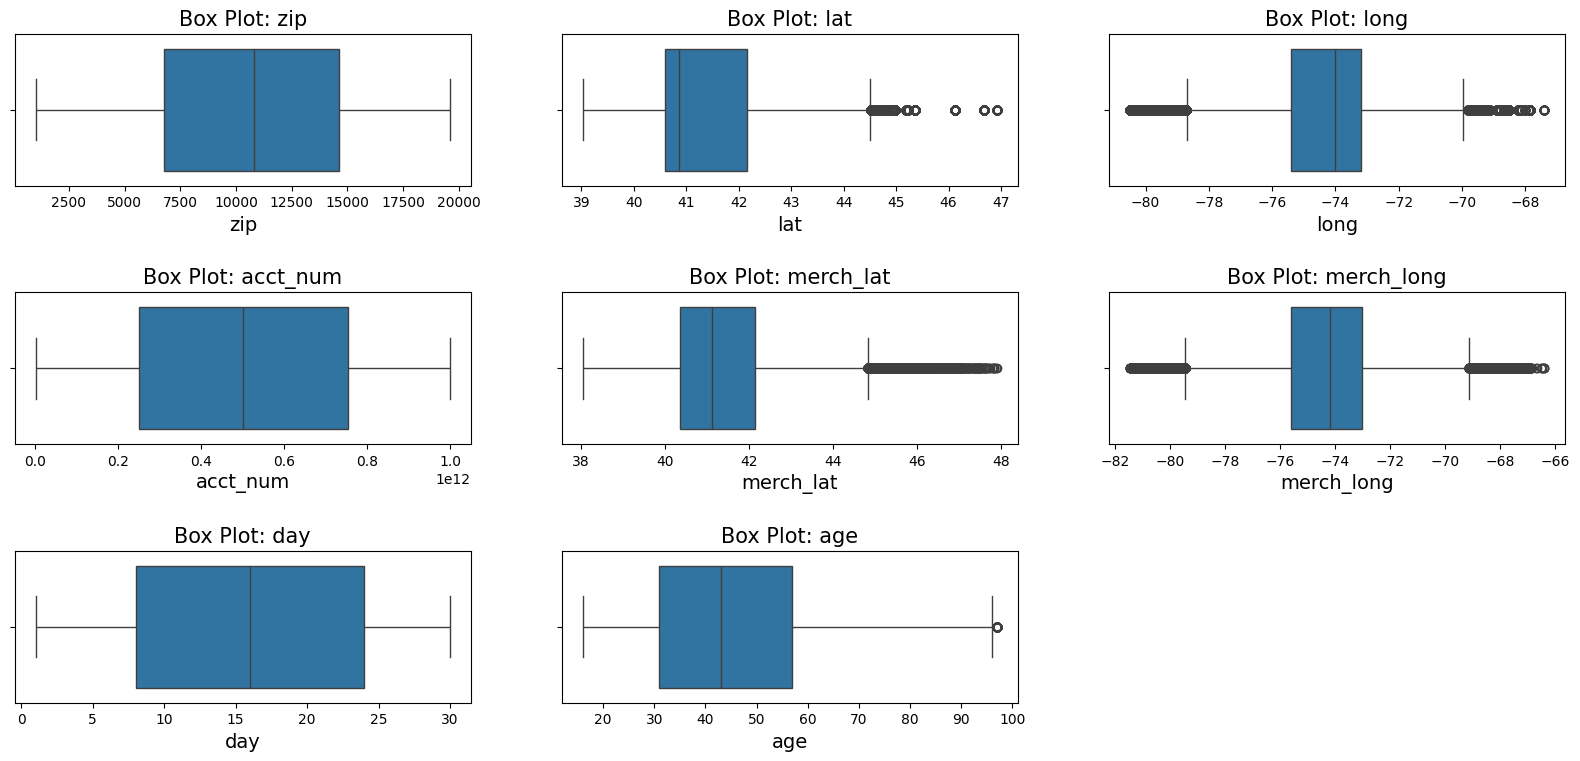

In [283]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df_num):
    for i, col in enumerate(df_num.columns):
        if col != 'income':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df_num, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df_num)

In [182]:
import pickle
with open('fruad_df2.pkl', 'wb') as f:
    pickle.dump(df_protocol, f)

print("fruad_df2 saved as a pickle file.")

fruad_df2 saved as a pickle file.


In [217]:
with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)

print("df saved as a pickle file.")

df saved as a pickle file.


In [183]:
with open('fruad_num.pkl', 'wb') as f:
    pickle.dump(df_num, f)

print("fruad_num saved as a pickle file.")

fruad_num saved as a pickle file.


In [185]:
with open('fruad_dummy.pkl', 'wb') as f:
    pickle.dump(df_dummy, f)

print("fruad_dummy saved as a pickle file.")

fruad_dummy saved as a pickle file.


In [230]:
with open('fruad_category.pkl', 'wb') as f:
    pickle.dump(df_category, f)

print("fruad_category saved as a pickle file.")

fruad_category saved as a pickle file.


In [187]:
with open('fruad_text.pkl', 'wb') as f:
    pickle.dump(df_text, f)

print("fruad_text saved as a pickle file.")

fruad_text saved as a pickle file.


# OUTLIERS DF

IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [262]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df_num:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df_num[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = outliers_df(df_num).sort_values('Percent', ascending=False)
outliers_df

Outlier count    Percent
long              25148.0  10.067979
merch_long        14951.0   5.985619
lat                4957.0   1.984531
merch_lat          3479.0   1.392815
age                  92.0   0.036832

Labeling every outlier with 'Outlier'

In [271]:
def outliers(df):
    label_out_df = df_num.copy()
    for col in label_out_df:
        if col in outliers_df.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_df[col] = np.where(label_out_df[col] > upper_limit,'Outlier',np.where(label_out_df[col] < lower_limit,'Outlier',label_out_df[col]))
    return label_out_df
new_df_outliers = outliers(df)
new_df_outliers

zip      lat      long      acct_num  merch_lat  merch_long  day  \
185       7005  40.9115   -74.414  826475243361  41.497516  -74.258973    9   
186       7005  40.9115   -74.414  826475243361  40.661566   -73.84918   11   
187       7005  40.9115   -74.414  826475243361  41.655939  -75.234739   23   
188       7005  40.9115   -74.414  826475243361  40.062355  -74.923742   24   
189       7005  40.9115   -74.414  826475243361  41.285106  -74.645948    8   
...        ...      ...       ...           ...        ...         ...  ...   
1364531  12414  42.2276  -73.8985  846920444376  41.833756  -74.700726   27   
1364532  12414  42.2276  -73.8985  846920444376  41.820045   -74.55525    2   
1364533  12414  42.2276  -73.8985  846920444376  42.991588  -73.760047   30   
1364534  12414  42.2276  -73.8985  846920444376  42.047309  -73.327625   27   
1364535  12414  42.2276  -73.8985  846920444376  42.359574  -74.229708   10   

        age  
185      22  
186      22  
187      22  
188      22  
189      22  
...      ..  
1364531  57  
1364532  57  
1364533  57  
1364534  57  
1364535  57  

[249782 rows x 8 columns]

Crearting df_outliers with dummies

In [264]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

zip  lat  long  acct_num  merch_lat  merch_long  day  age
185        0    0     0         0          0           0    0    0
186        0    0     0         0          0           0    0    0
187        0    0     0         0          0           0    0    0
188        0    0     0         0          0           0    0    0
189        0    0     0         0          0           0    0    0
...      ...  ...   ...       ...        ...         ...  ...  ...
1364531    0    0     0         0          0           0    0    0
1364532    0    0     0         0          0           0    0    0
1364533    0    0     0         0          0           0    0    0
1364534    0    0     0         0          0           0    0    0
1364535    0    0     0         0          0           0    0    0

[249782 rows x 8 columns]